<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction Challenge For Azubian**

## **Project Statement of the Problem**:
The focus of this project is a customer churn prediction for an African telecommunications firm that provides customers with airtime and mobile data bundles. The company aims to create a machine learning model capable of effectively forecasting the probability of individual customers "churning," which means they become inactive and not making any transactions for a period of 90 days. Accurate churn prediction plays a pivotal role in the company's success, as it empowers proactive strategies to retain customers and minimize revenue loss.

## **Project Objective**:
The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days. This will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

## **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.

## **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

## **Business Questions**

### 1. What is the Company’s overall churn rate throughout the observed period?

### 2. Are there particular regions that exhibit a higher churn rate than others?

### 3. Which tenure period shows the most significant representation?

### 4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

### 5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

### 6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

### 7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?



 .

.

# Data Understanding
- Data collated from the ***Customer Relationship Management*** team contains demographic and usage information for each customer as well as whether or not they churned. Below are meanings to each varible provided in the dataset

The churn dataset includes 19 variables including 15 numeric variables and 4 categorical variables.
1. user_id - Unique identifier for each customer
2. REGION - the location of each client
3. TENURE - duration in the network
4. MONTANT - top-up amount
5. FREQUENCE_RECH - number of times the customer refilled
5. REVENUE - monthly income of each client
6. ARPU_SEGMENT - income over 90 days / 3
7. FREQUENCE - number of times the client has made an income
8. DATA_VOLUME - number of connections
9. ON_NET - inter expresso call
10. ORANGE - call to orange
11. TIGO - call to Tigo
12. ZONE1 - call to zones1
13. ZONE2 - call to zones2
14. MRG - a client who is going
15. REGULARITY - number of times the client is active for 90 days
16. TOP_PACK - the most active packs
17. FREQ_TOP_PACK - number of times the client has activated the top pack packages
18. CHURN - variable to predict - Target

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installing relevant libraries
# %pip install tabulate
# %pip install plotly
# %pip install statsmodels
# %pip install imblearn
# %pip install phik
# %pip install xgboost
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [97]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick
import squarify
# EDA (pandas-profiling, etc. )
import missingno as mno

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# 
train = pd.read_csv("Train.csv")
test = pd.read_csv("data/Test.csv")

# Data Understanding

## Data Exploration & Data Preparation

### Preview Datasets

In [4]:
# previewing a section of the train dataset 
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [5]:
# previewing a section of the test dataset
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [6]:
train.shape, test.shape

((1077024, 19), (190063, 18))

In [7]:
train.columns.values, test.columns.values

(array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
        'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
        'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
        'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'], dtype=object),
 array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
        'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
        'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
        'TOP_PACK', 'FREQ_TOP_PACK'], dtype=object))

In [8]:
# Checking the data types of the columns
print('Train Column type') 
print (train.dtypes)

print('__________________________')

print('Test Column type') 
print (test.dtypes)

Train Column type
user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object
__________________________
Test Column type
user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK      

**Remark**

Our train Dataset has 19 variables and 16 of them are numeric with our target variable "Churn" also being numeric 

same applies to the test dataset, just that it is missing the target variable 

In [9]:
# taking the Statistical Summary of the the train numeric Dataset
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,699139.000000,699139.000000,714669.000000,714669.000000,714669.000000,5.472610e+05,683850.000000,629880.000000,432250.000000,84898.000000,68794.000000,1.077024e+06,626129.000000,1.077024e+06
mean,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3.368802e+03,277.065798,95.160804,23.105018,8.167483,7.709844,2.804450e+01,9.262446,1.875474e-01
std,7104.737952,13.261938,7175.625010,2391.870902,14.687059,1.289893e+04,874.315378,203.020261,64.035464,39.245883,36.090513,2.228861e+01,12.242316,3.903505e-01
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000e+00
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,2.580000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,2.400000e+01,5.000000,0.000000e+00
75%,7350.000000,16.000000,7360.000000,2453.000000,20.000000,2.905000e+03,156.000000,99.000000,20.000000,3.000000,5.000000,5.100000e+01,12.000000,0.000000e+00
max,470000.000000,131.000000,532177.000000,177392.000000,91.000000,1.702309e+06,50809.000000,12040.000000,4174.000000,2507.000000,3697.000000,6.200000e+01,624.000000,1.000000e+00


**Observation**
1. Average frquecy at which people Top-up is 11.5 times and with a total average amount of 5529.21
2. 75% of users recharging 16 times, where as 50% recharge about 7times and 25% do so 2 times 
3. With a standard deviation of 7175, it can be observed that incomes of clients are clustered around the mean value of 5506
4. It can also be observed that average on-net calls is more than calls to other networks.
5. Clients made more calls to orange numbers as compared to that of the Tigo

In [10]:
# Chech info of the variables,  To have a concise look at the dataframe, we will use verbose = True mode 
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [11]:
# Checking for Duplicated values 
train.duplicated().sum()

0

### Checking for Missing Values 

In [12]:
#checking for missing values 
train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [13]:
# Our data seem to be missing a lot of values 
percentage_missing =(train.isnull().sum() / len(train)) * 100
percentage_missing

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

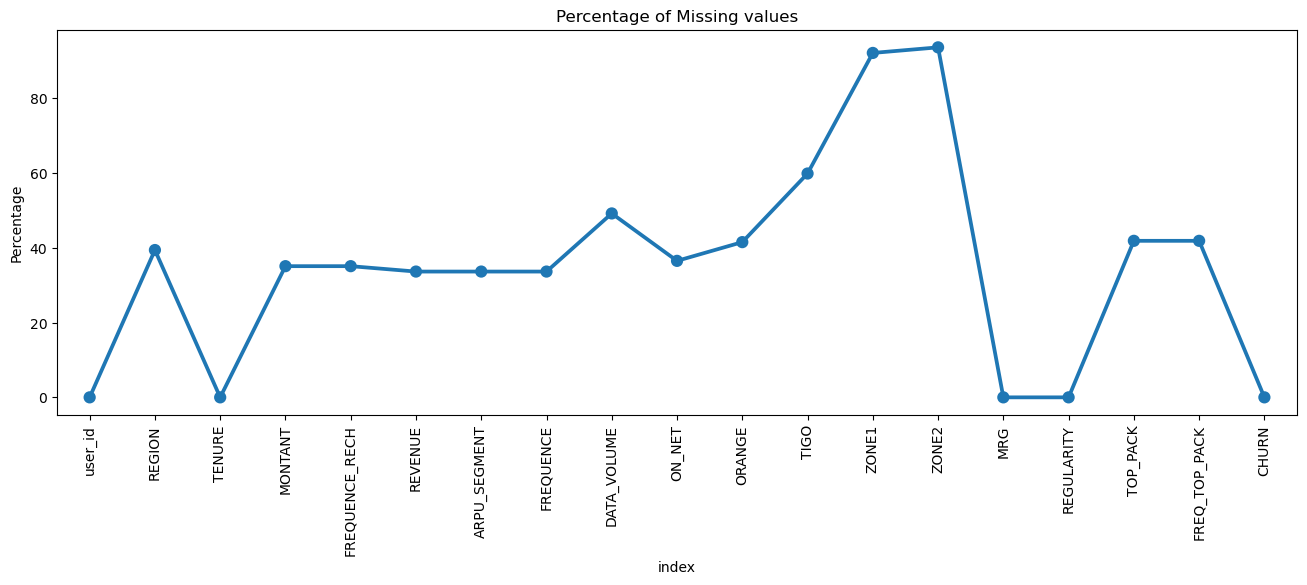

In [14]:
# Plotting  a Graphical view of the percentage of our Missing Data
missing = pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation = 90, fontsize = 10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

In [15]:
# creating a copy of the train dataset so we can make chanegs to it 
train_df=train.copy()

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Univariate Analysis
in this section we will explore, analyze, visualize each variable independently of the others.

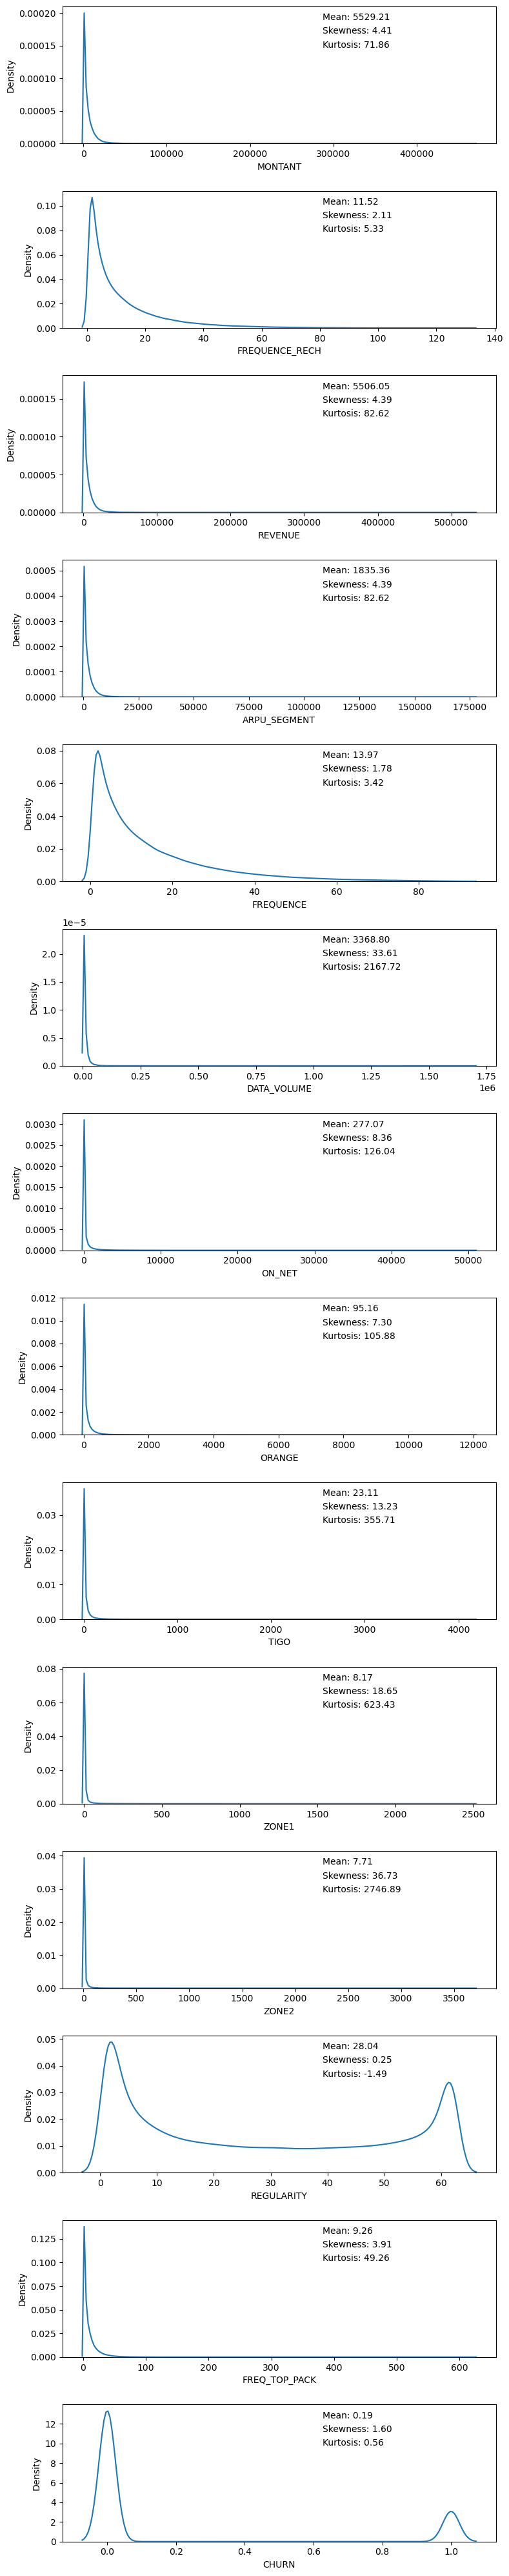

In [16]:

# Extracting all numerical variables 
num_cols = train_df.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=train, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = train_df[col].mean()
    skewness_val = train[col].skew()
    kurtosis_val = train[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
plt.tight_layout()
plt.show()

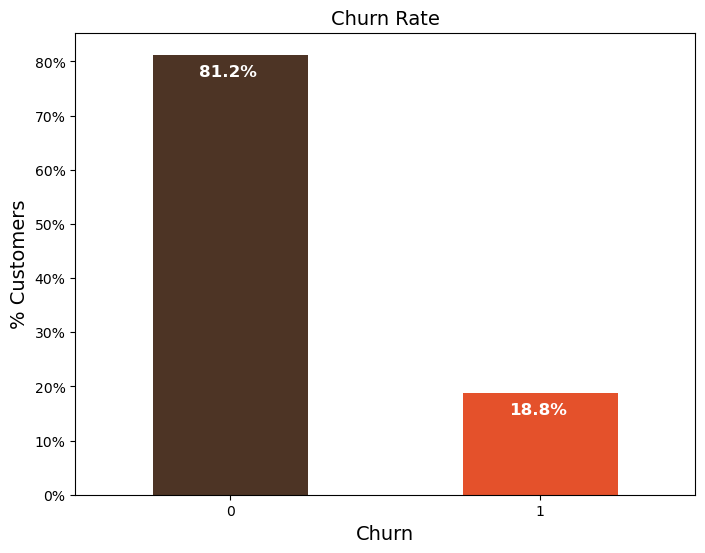

In [17]:
# Checking the percentage of customers who churned again those who did not 
colors = ['#4D3425','#E4512B']
ax = (train_df['CHURN'].value_counts()*100.0 /len(train)).plot(kind='bar', stacked = True, 
                                                                          rot = 0, color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

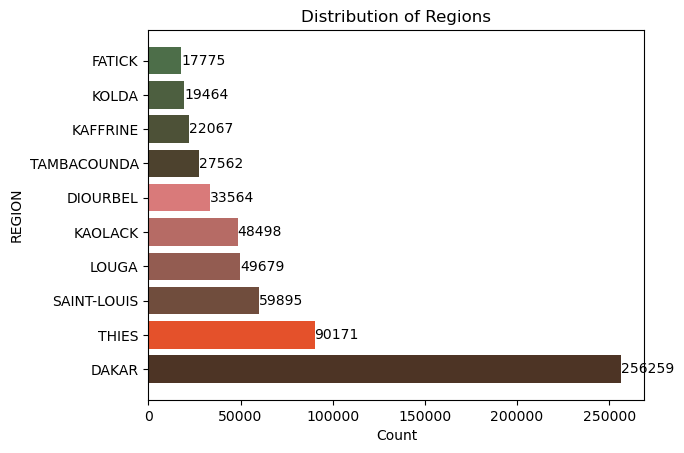

In [18]:
#Horizontal bar distribution of the Region
region= train_df['REGION'].value_counts().head(10)
colors = ['#4D3425','#E4512B','#704D3D','#935C51','#B66B65','#D97A7A','#4D422E','#4D5137','#4D5F40','#4D6E49']

plt.barh(region.index, region.values, color=colors)
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Distribution of Regions')

# Add data labels
for i, count in enumerate(region.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

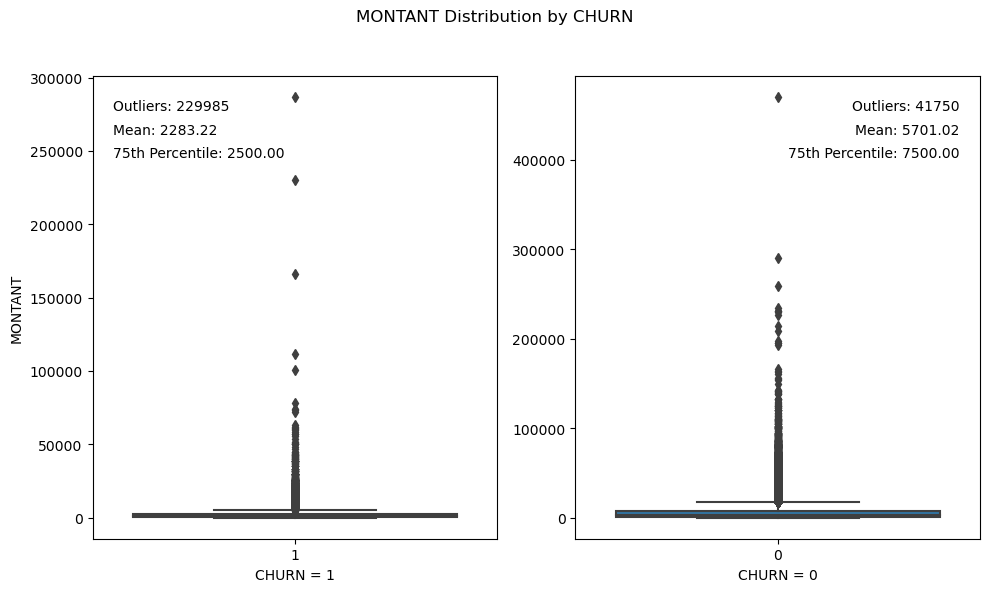

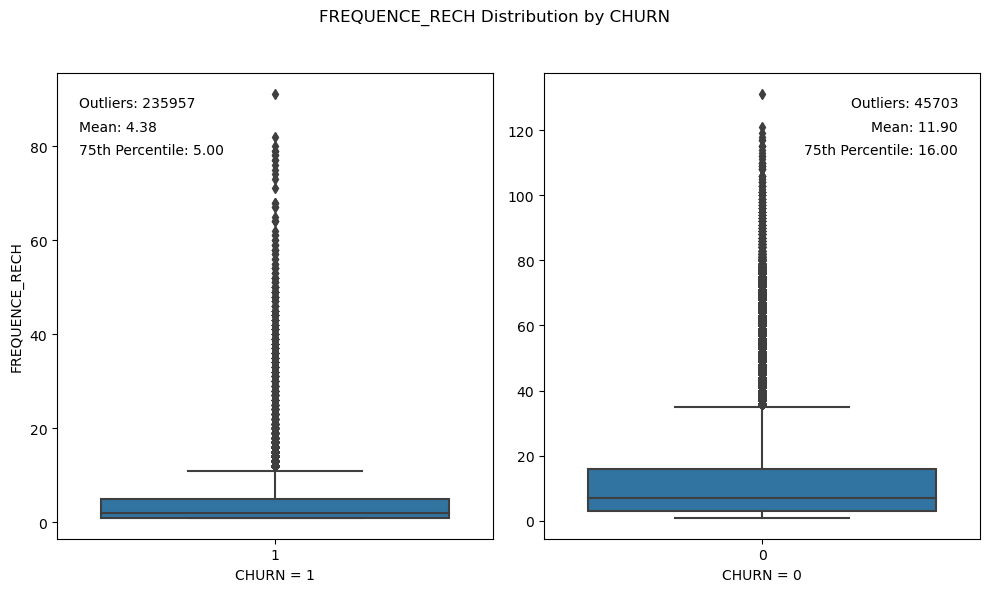

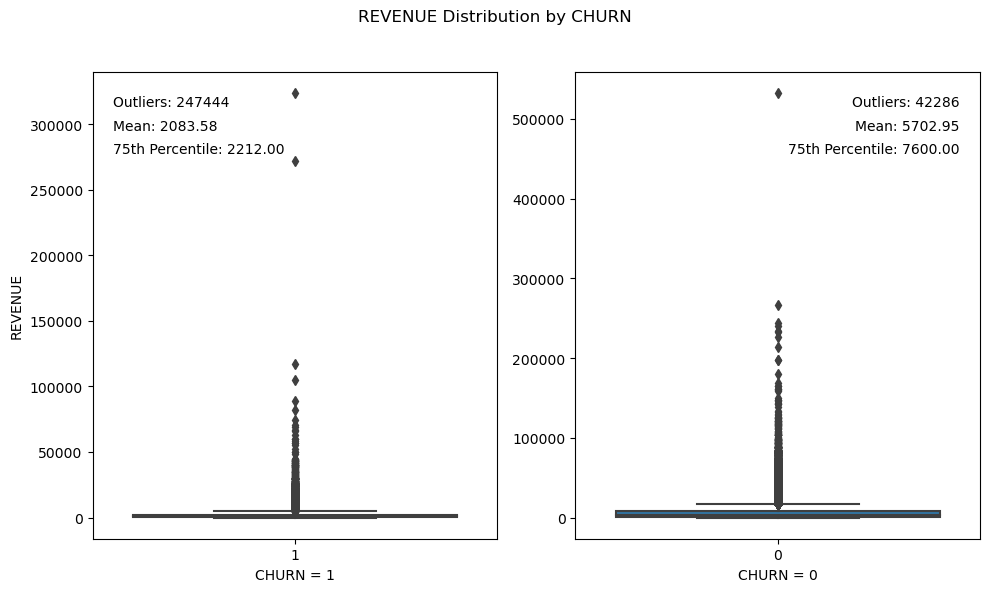

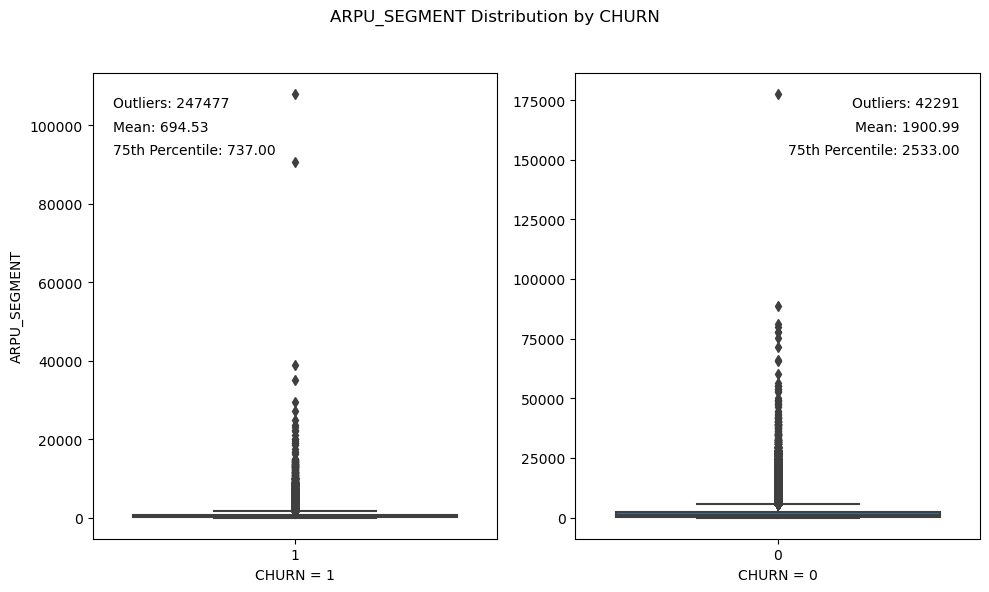

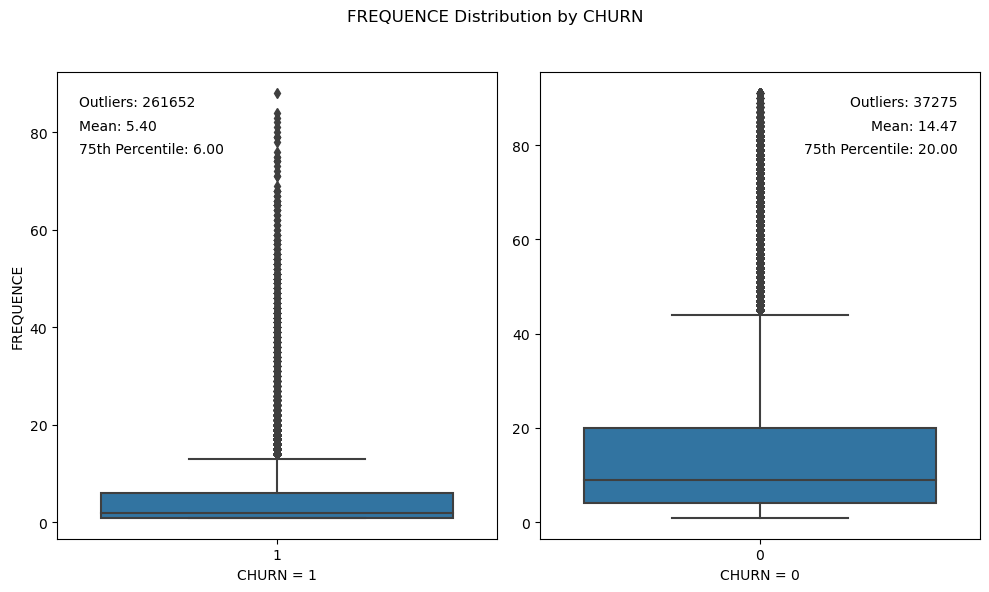

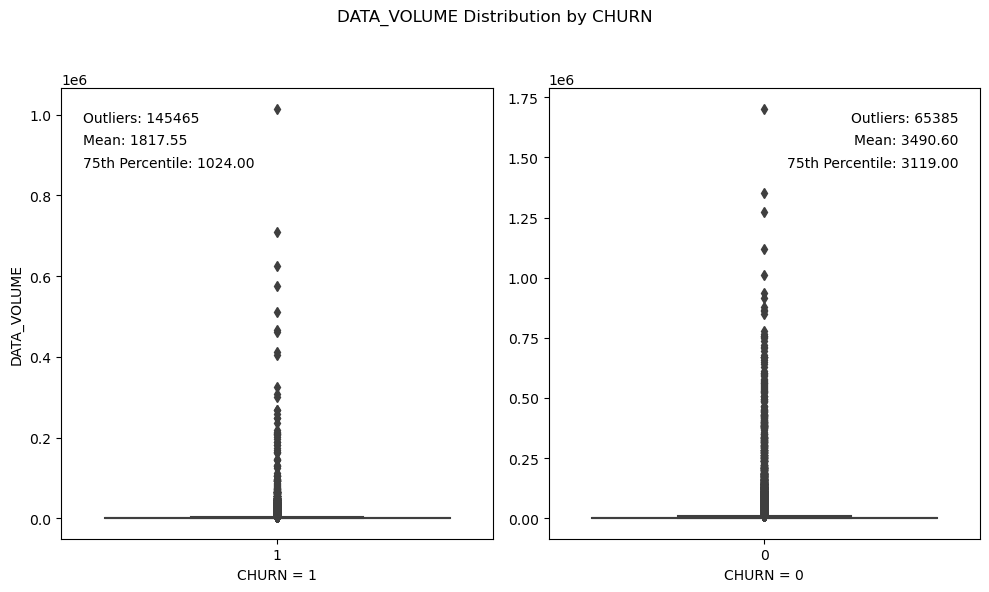

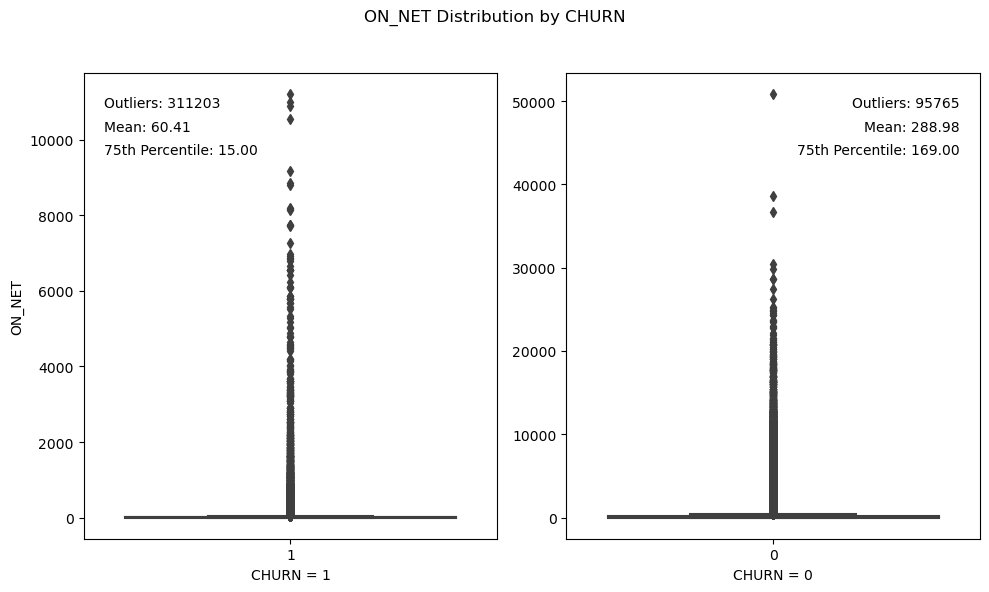

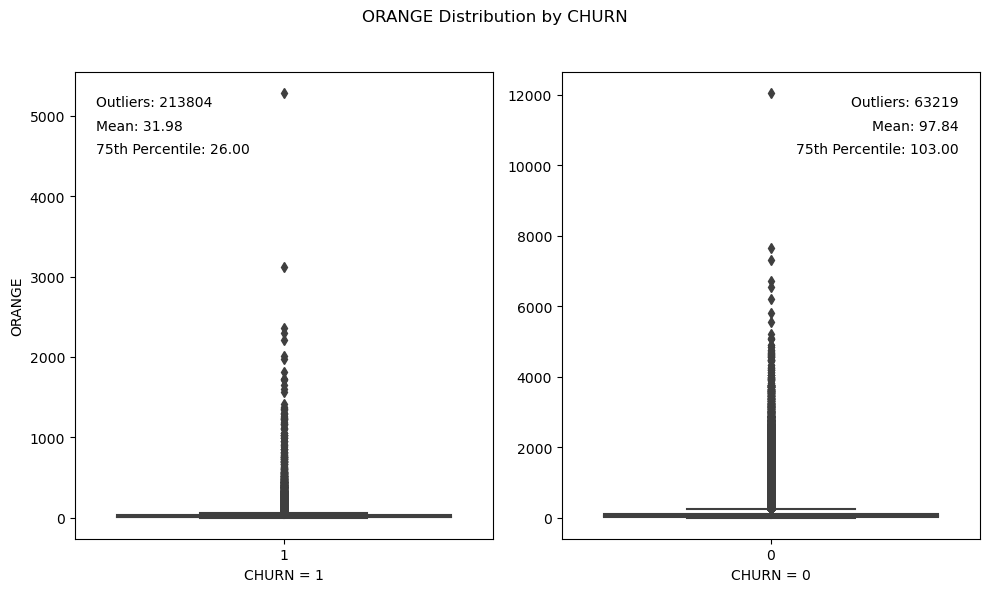

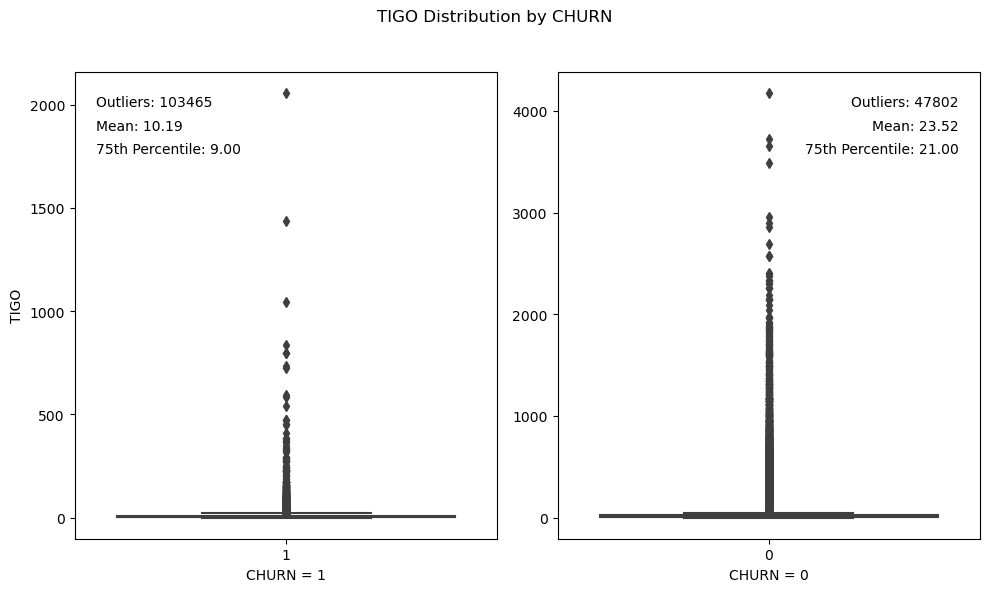

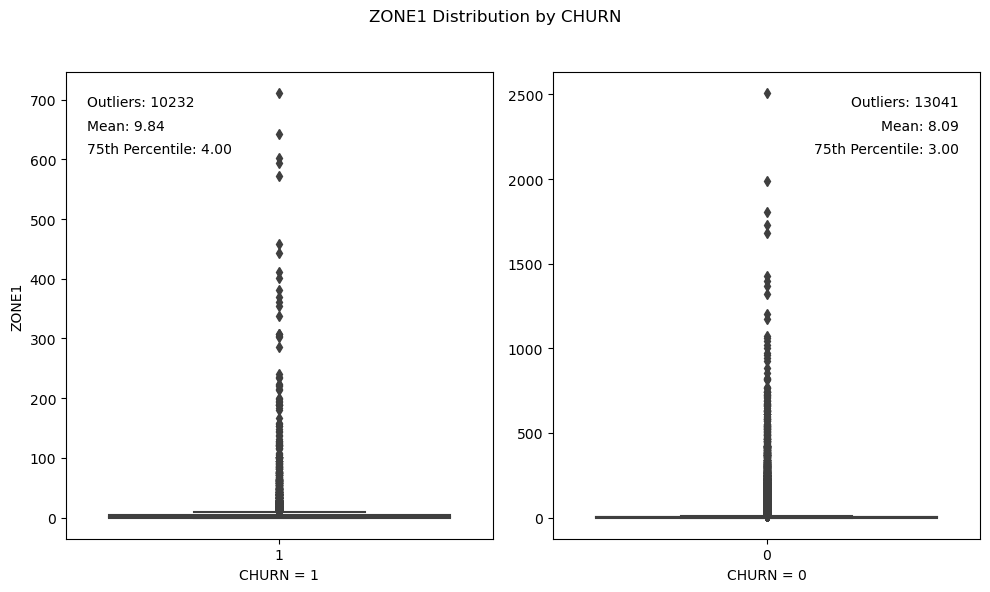

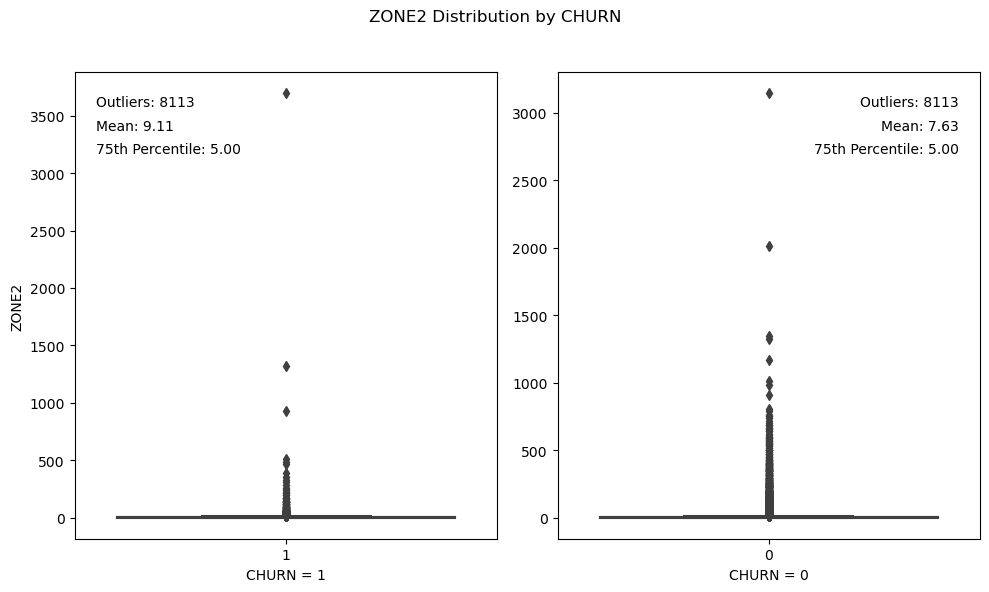

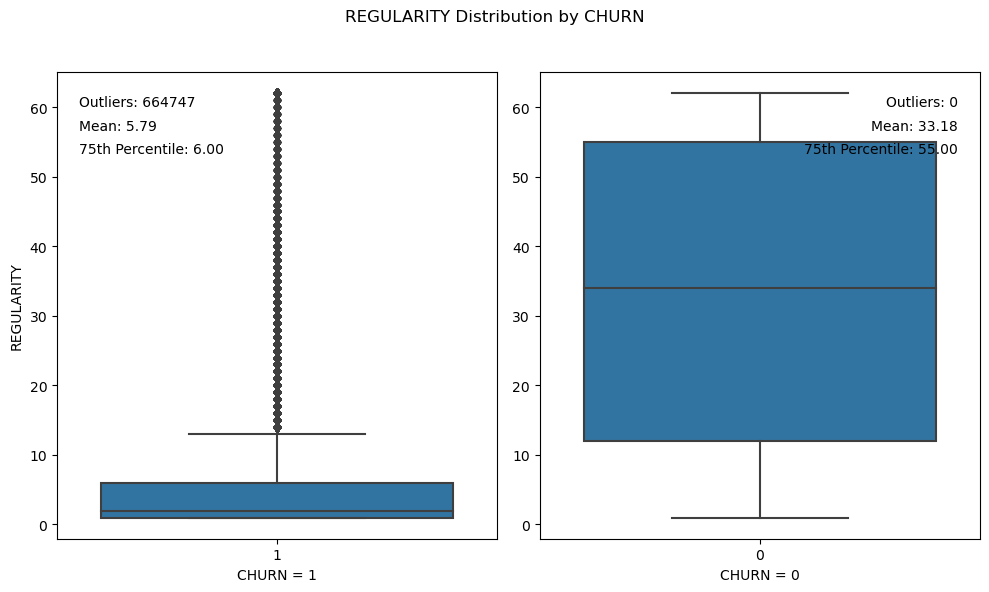

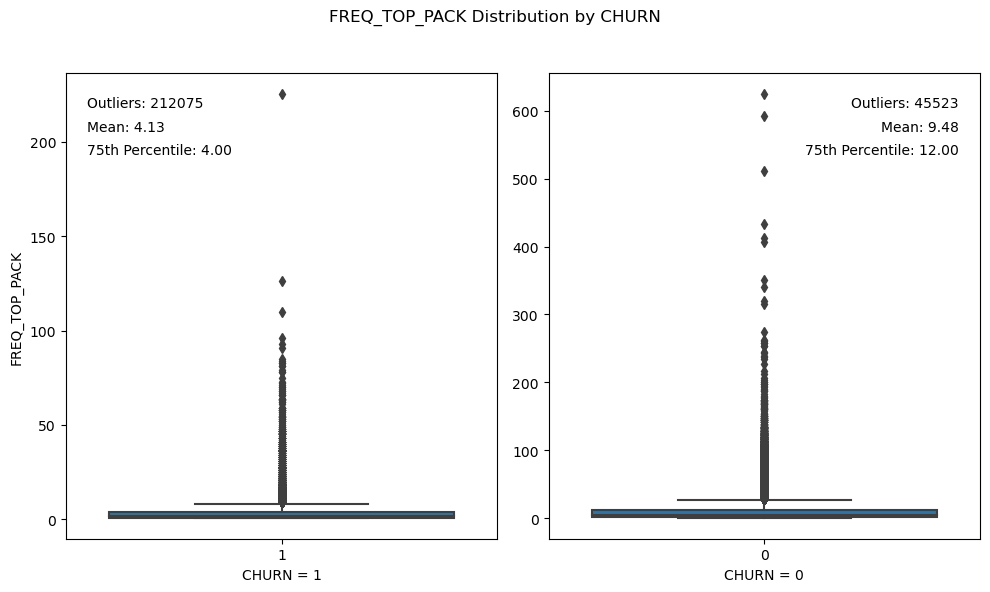

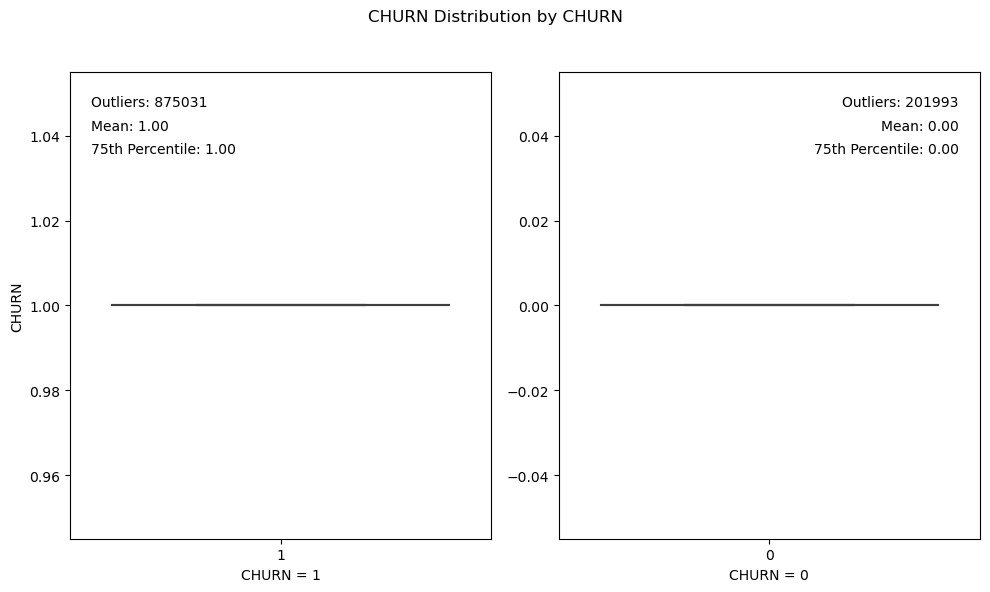

In [19]:
# Extracting all numerical variables
for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Plot boxplot for churn = 1
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_df[train_df['CHURN'] == 1], x='CHURN', y=col)
    q75_1 = train_df[train_df['CHURN'] == 1][col].quantile(0.75)
    q25_1 = train_df[train_df['CHURN'] == 1][col].quantile(0.25)
    iqr_1 = q75_1 - q25_1
    outliers_1 = train_df[(train_df[col] < q25_1 - 1.5 * iqr_1) | (train_df[col] > q75_1 + 1.5 * iqr_1)][col]
    num_outliers_1 = len(outliers_1)
    plt.text(0.05, 0.95, f"Outliers: {num_outliers_1}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f"Mean: {train_df[train_df['CHURN'] == 1][col].mean():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"75th Percentile: {q75_1:.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 1')
    plt.ylabel(col)
    
    # Plot boxplot for churn = 0
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train_df[train_df['CHURN'] == 0], x='CHURN', y=col)
    q75_0 = train_df[train_df['CHURN'] == 0][col].quantile(0.75)
    q25_0 = train_df[train_df['CHURN'] == 0][col].quantile(0.25)
    iqr_0 = q75_0 - q25_0
    outliers_0 = train_df[(train_df[col] < q25_0 - 1.5 * iqr_0) | (train_df[col] > q75_0 + 1.5 * iqr_0)][col]
    num_outliers_0 = len(outliers_0)
    plt.text(0.95, 0.95, f"Outliers: {num_outliers_0}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f"Mean: {train_df[train_df['CHURN'] == 0][col].mean():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f"75th Percentile: {q75_0:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 0')
    plt.ylabel('')
    
    plt.suptitle(f'{col} Distribution by CHURN')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

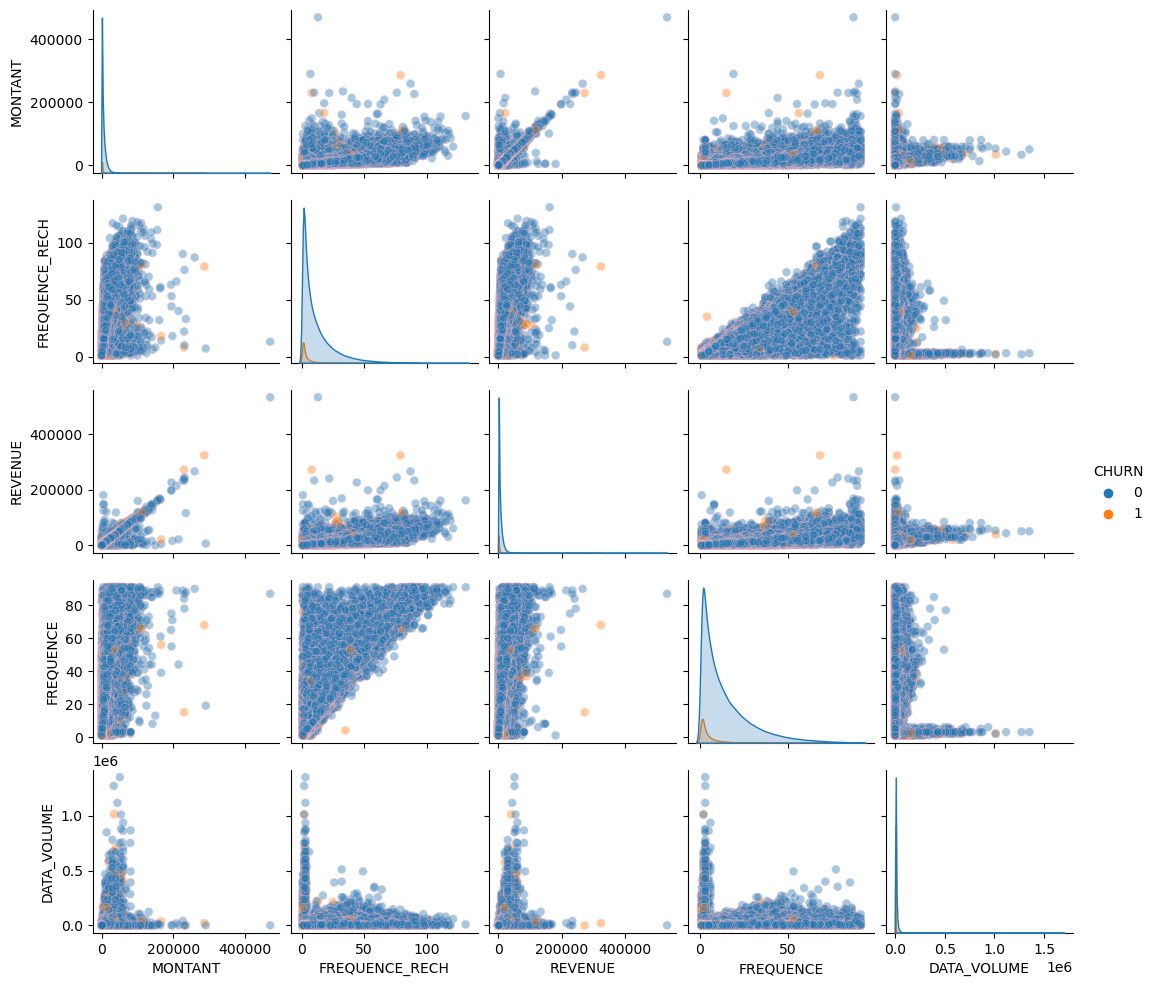

In [20]:
# split 'MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN churn and not_churn categories
sns.pairplot(train_df[['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN']],hue='CHURN',
             plot_kws=dict(alpha=0.4, edgecolor='pink'),height=2,aspect=1.1)

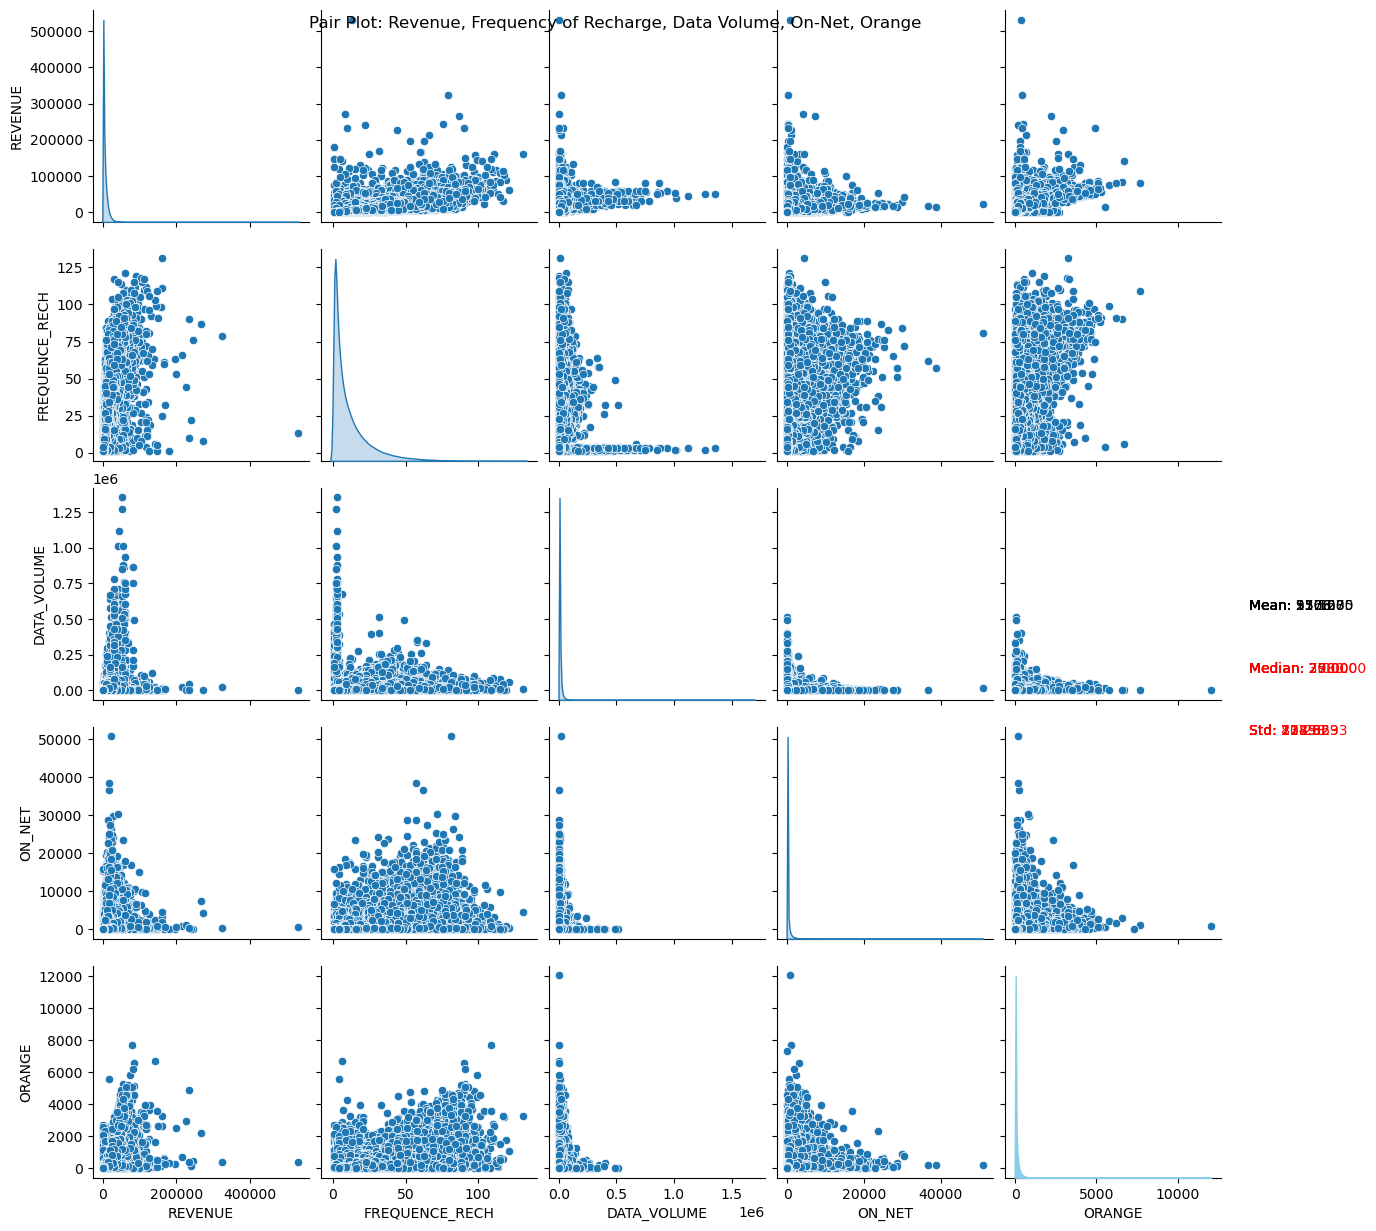

In [21]:
# Create a pair plot with KDE
sns.pairplot(train_df[['REVENUE', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE']], diag_kind='kde')

# Add color customization
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightblue']
for i, j in zip(range(5), colors):
    plt.gca().get_children()[i].set_color(j)

# Add statistics annotations
numerical_cols = ['REVENUE', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE']
for col in numerical_cols:
    mean = train_df[col].mean()
    median = train_df[col].median()
    std = train_df[col].std()
    plt.gca().annotate(f"Mean: {mean:.2f}", xy=(1, 0.5), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='black', ha='left', va='center')
    plt.gca().annotate(f"Median: {median:.2f}", xy=(1, 0.45), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='red', ha='left', va='center')
    plt.gca().annotate(f"Std: {std:.2f}", xy=(1, 0.4), xycoords=('axes fraction', 'figure fraction'),
                       xytext=(20, 0), textcoords='offset points', color='red', ha='left', va='center')

# Set title
plt.suptitle('Pair Plot: Revenue, Frequency of Recharge, Data Volume, On-Net, Orange')

# Display the plot
plt.show()

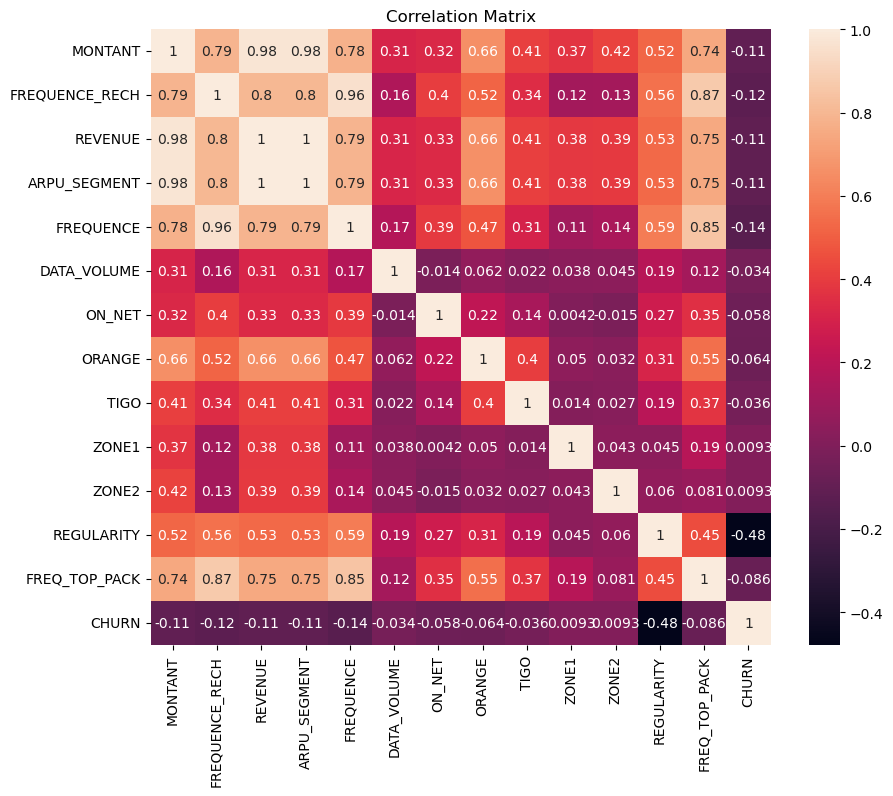

In [22]:
# Calculate correlation matrix
corr =train_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
#Checking the correlation of the target variable with all the other variables 
churn_corr = train_df.corr()[['CHURN']].sort_values(by='CHURN', ascending=False)
churn_corr

,CHURN
CHURN,1.000000
ZONE1,0.009309
ZONE2,0.009279
DATA_VOLUME,-0.033699
TIGO,-0.035993
ON_NET,-0.058102
ORANGE,-0.064132
FREQ_TOP_PACK,-0.086267
MONTANT,-0.105110
REVENUE,-0.114401


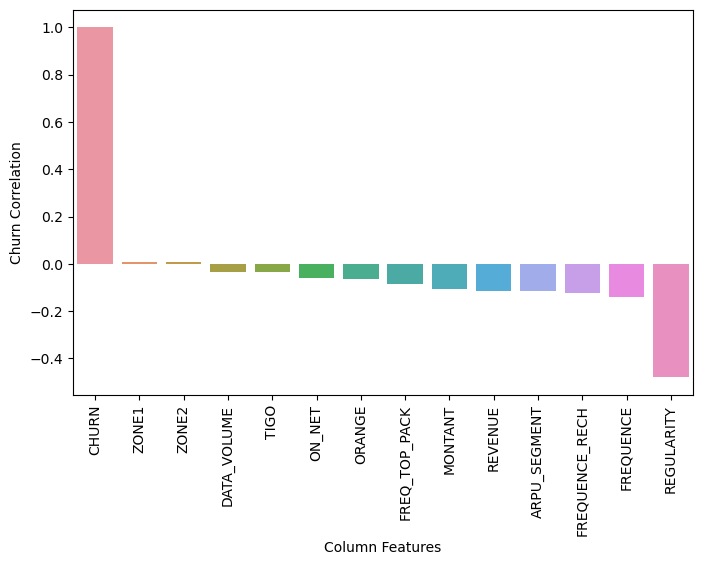

In [24]:

#Visualizsing the correlation between other variables and churn
plt.figure(figsize=(8,5))
# create a barplot for the churn-correlation
sns.barplot(data=churn_corr, x=churn_corr.index, y='CHURN')
plt.ylabel('Churn Correlation')
plt.xlabel('Column Features')
plt.xticks(rotation=90)
plt.show();

In [25]:
train_df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

### **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.



In [26]:
from scipy.stats import chi2_contingency

In [27]:
# Creating a contingency table
contingency_table = pd.crosstab(train['TENURE'], train['CHURN'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between TENURE and CHURN.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between TENURE and CHURN.")

Chi-square statistic: 2898.5207691813353
P-value: 0.0
Reject the null hypothesis. There is no significant relationship between TENURE and CHURN.


### **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

In [28]:
# Creating a contingency table
contingency_table = pd.crosstab(train['REVENUE'], train['CHURN'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between REVENUE and CHURN.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between REVENUE and CHURN.")

Chi-square statistic: 59958.41001124388
P-value: 0.0
Reject the null hypothesis. There is no significant relationship between REVENUE and CHURN.


### Answering Business Questions 

1. What is the Company’s overall churn rate throughout the observed period?

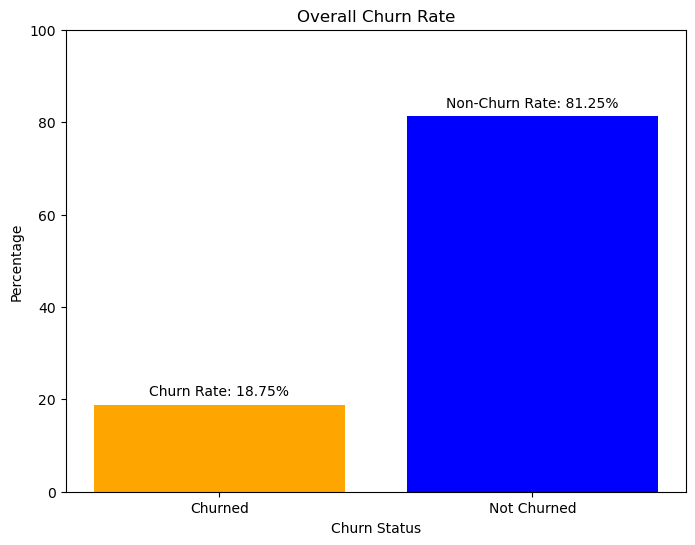

In [29]:
# Calculate the overall churn rate
churn_rate = train_df['CHURN'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Not Churned'], [churn_rate, 100 - churn_rate], color=['orange', 'blue'])
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.title('Overall Churn Rate')
plt.ylim(0, 100)
plt.text(0, churn_rate + 2, f'Churn Rate: {churn_rate:.2f}%', ha='center')
plt.text(1, 100 - churn_rate + 2, f'Non-Churn Rate: {100 - churn_rate:.2f}%', ha='center')

plt.show()


2. Are there particular regions that exhibit a higher churn rate than others?

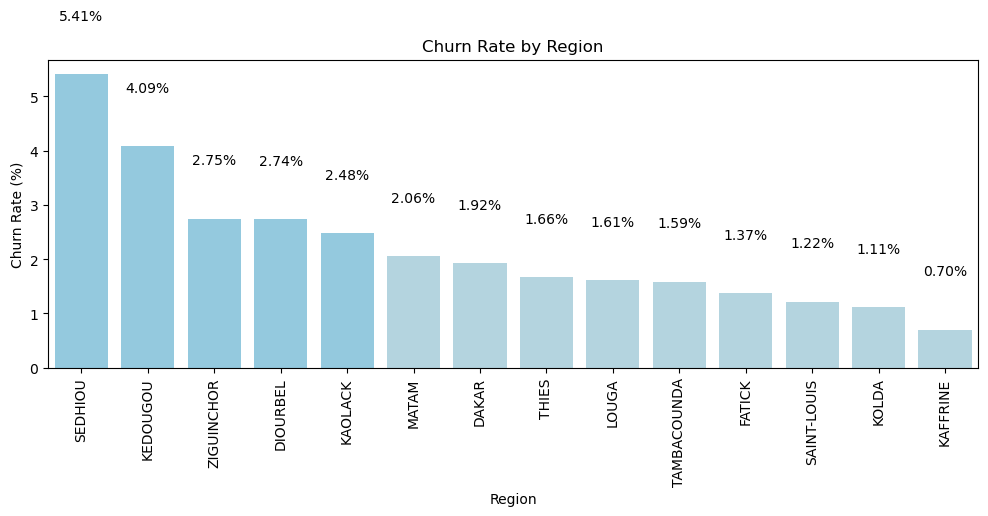

In [30]:
# Calculate the churn rate by region
churn_rate_by_region = train_df.groupby('REGION')['CHURN'].mean() * 100

# Sort the regions by churn rate in descending order
sorted_regions = churn_rate_by_region.sort_values(ascending=False)

# Define colors for the bars
colors = ['skyblue' if rate > sorted_regions.mean() else 'lightblue' for rate in sorted_regions]

# Create a bar plot
plt.figure(figsize=(12, 4))
sns.barplot(x=sorted_regions.index, y=sorted_regions, palette=colors)
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region')

# Add labels to the bars
for i, rate in enumerate(sorted_regions):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=90)
plt.show()


3. Which tenure are likely to churn more are compared to the average rate of churn?

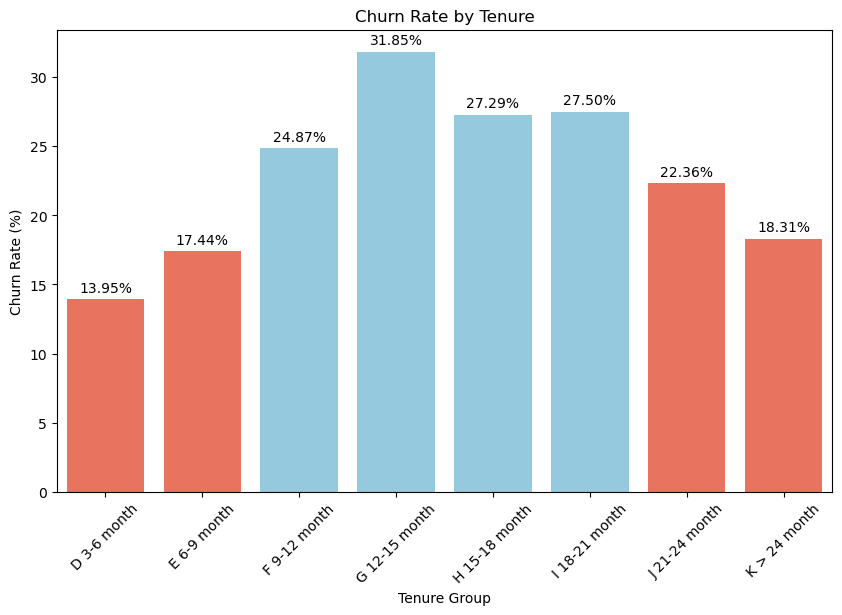

In [31]:
# Calculate the churn rate by tenure group
churn_rate_by_tenure = train_df.groupby('TENURE')['CHURN'].mean() * 100

# Sort the tenure groups in ascending order
sorted_tenure = churn_rate_by_tenure.sort_index()

# Define colors for the bars
colors = ['tomato' if rate < sorted_tenure.mean() else 'skyblue' for rate in sorted_tenure]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_tenure.index, y=sorted_tenure, palette=colors)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')

# Add labels to the bars
for i, rate in enumerate(sorted_tenure):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()


4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

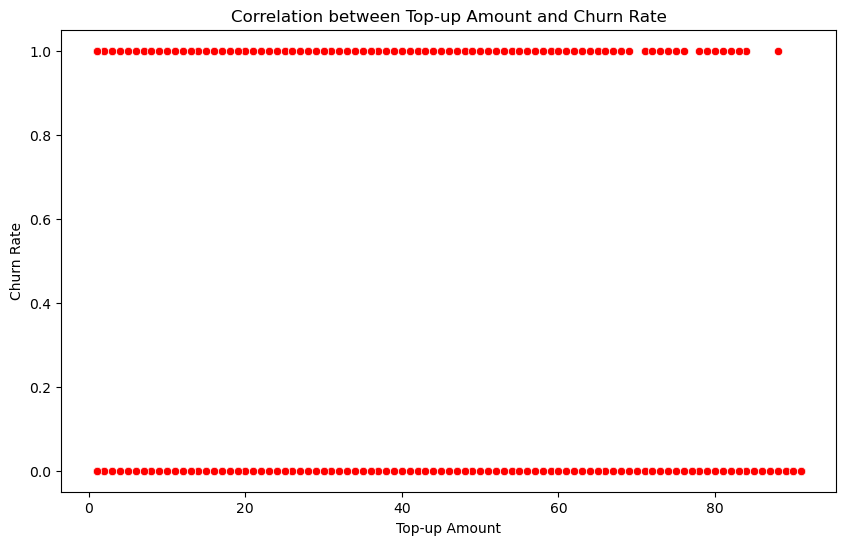

In [32]:
# Plot correlation between top-up amount and churn rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='FREQUENCE', y='CHURN',  color='red')
plt.title('Correlation between Top-up Amount and Churn Rate')
plt.xlabel('Top-up Amount')
plt.ylabel('Churn Rate')
plt.show()

5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


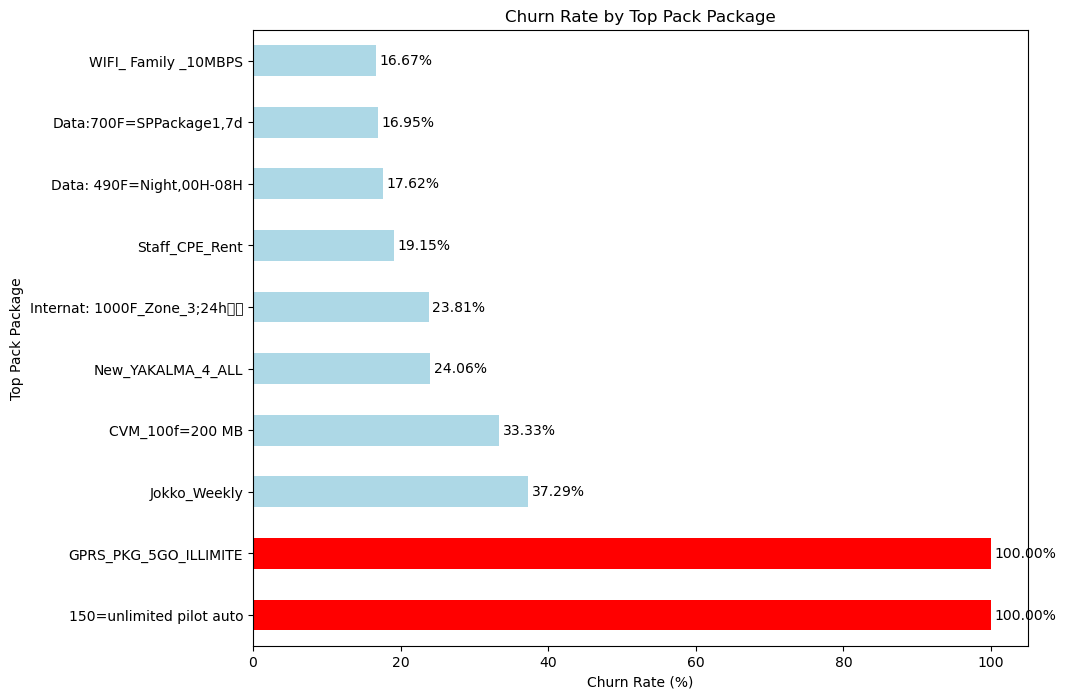

In [33]:
# Calculate the churn rate by top pack packages
churn_rate_by_top_pack = train_df.groupby('TOP_PACK')['CHURN'].mean() * 100

# Sort the churn rates in descending order and select the top 10
churn_rate_by_top_pack = churn_rate_by_top_pack.sort_values(ascending=False).head(10)

# Define colors for the bars
colors = ['red' if rate > churn_rate_by_top_pack.mean() else 'lightblue' for rate in churn_rate_by_top_pack]

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = churn_rate_by_top_pack.plot(kind='barh', color=colors)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Top Pack Package')
plt.title('Churn Rate by Top Pack Package')

# Add labels to the bars
for i, rate in enumerate(churn_rate_by_top_pack):
    plt.text(rate + 0.5, i, f'{rate:.2f}%', va='center')

plt.show()

6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

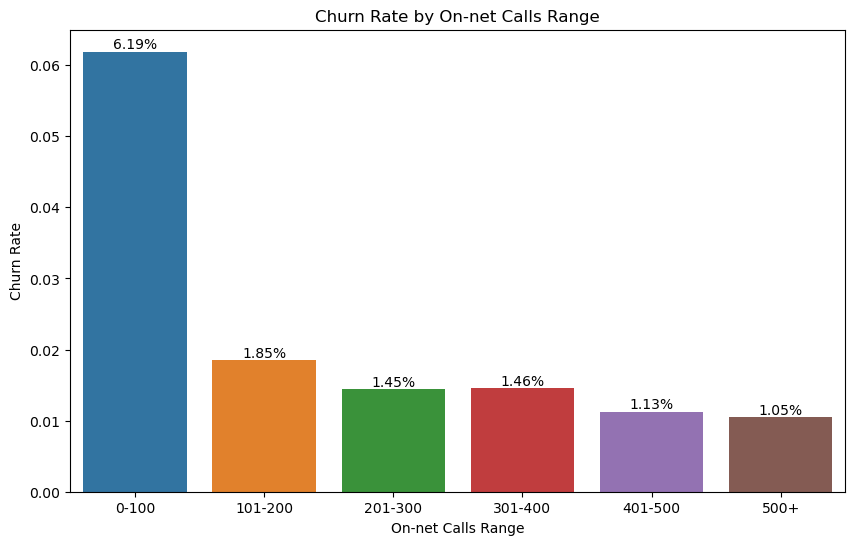

In [34]:
# Calculate the churn rate for different ranges of on-net calls
train_df['ON_NET_Range'] = pd.cut(train_df['ON_NET'], bins=[0, 100, 200, 300, 400, 500, float('inf')],
                            labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])

churn_rate_by_onnet_range = train_df.groupby('ON_NET_Range')['CHURN'].mean()

# Plot the churn rate for different ranges of on-net calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_onnet_range.index, y=churn_rate_by_onnet_range.values)
plt.title('Churn Rate by On-net Calls Range')
plt.xlabel('On-net Calls Range')
plt.ylabel('Churn Rate')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage = f'{height * 100:.2f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')

plt.show()


7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?


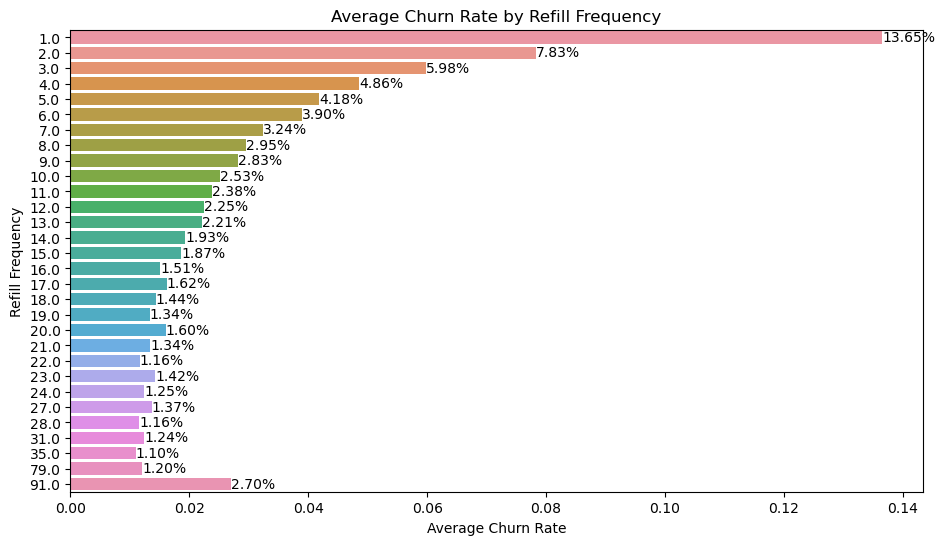

In [35]:
# Calculate the average churn rate for different categories of refill frequency
avg_churn_rate = train_df.groupby('FREQUENCE_RECH')['CHURN'].mean().sort_values(ascending=False).head(30)

# Plot the average churn rate for different refill frequency categories
plt.figure(figsize=(11, 6))
sns.barplot(x=avg_churn_rate.values, y=avg_churn_rate.index, orient='horizontal')
plt.title('Average Churn Rate by Refill Frequency')
plt.xlabel('Average Churn Rate')
plt.ylabel('Refill Frequency')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    percentage = f'{width * 100:.2f}%'
    ax.text(width, bar.get_y() + bar.get_height() / 2, percentage, ha='left', va='center')

plt.show()


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [96]:
# Check for missing values in the DataFrame
missing_values = train_df.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

print(missing_count)

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64


In [98]:

# Split the columns into numerical and categorical data
df = train_df.copy()
df.drop(['user_id'], axis=1, inplace=True)


# split the data into features (X) and target variable (y)
X = df.drop('CHURN', axis=1)
y = df['CHURN']

## Impute Missing Values

In [99]:
# Check for missing values in the DataFrame
missing_values = X.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

# Display the DataFrame with missing values
#print("DataFrame with missing values:")
#print(df)

# Display a DataFrame showing the locations of missing values
#print("\nDataFrame of missing values (True/False):")
#print(missing_values)

# Display the count of missing values in each column
print("\nCount of missing values in each column:")
print(missing_count)



Count of missing values in each column:
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
dtype: int64


<Axes: >

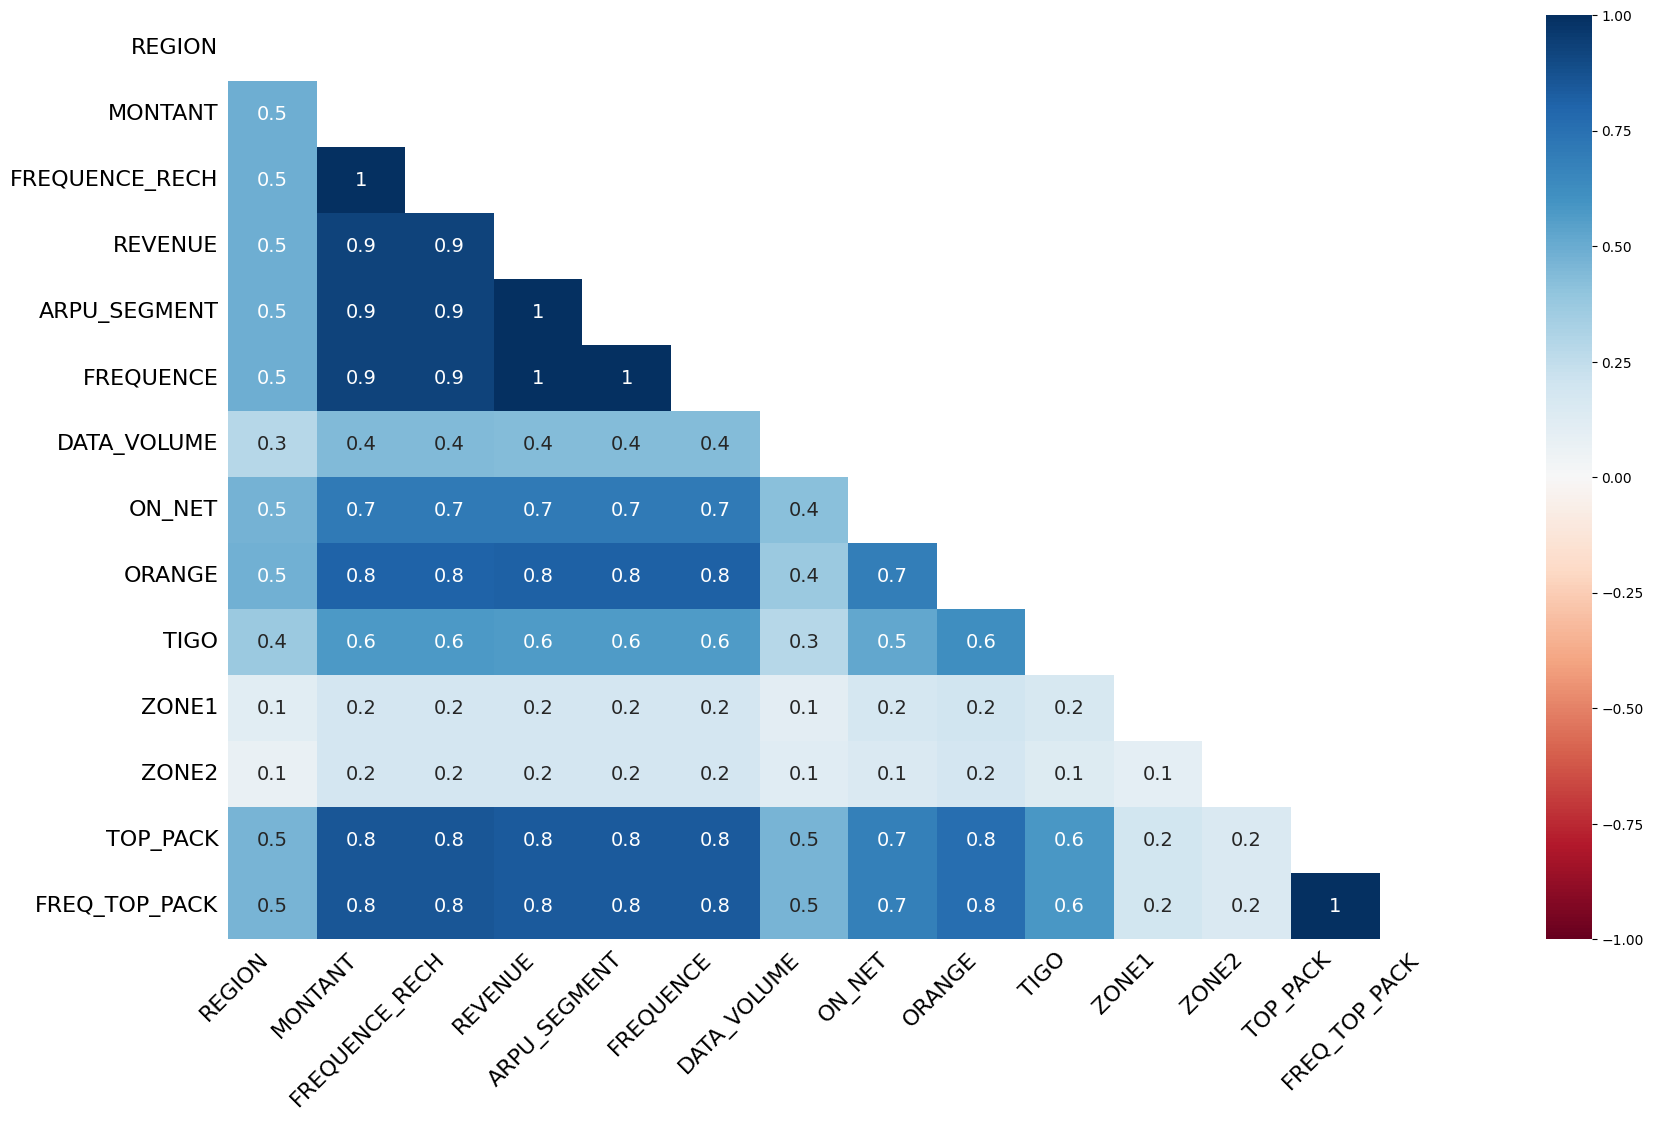

In [100]:
mno.heatmap(X)

The __heatmap function__ shows that there are strong correlations between missing values of different features. <br>
Low correlations indicate that the data are MAR(Missing at random).

<Axes: >

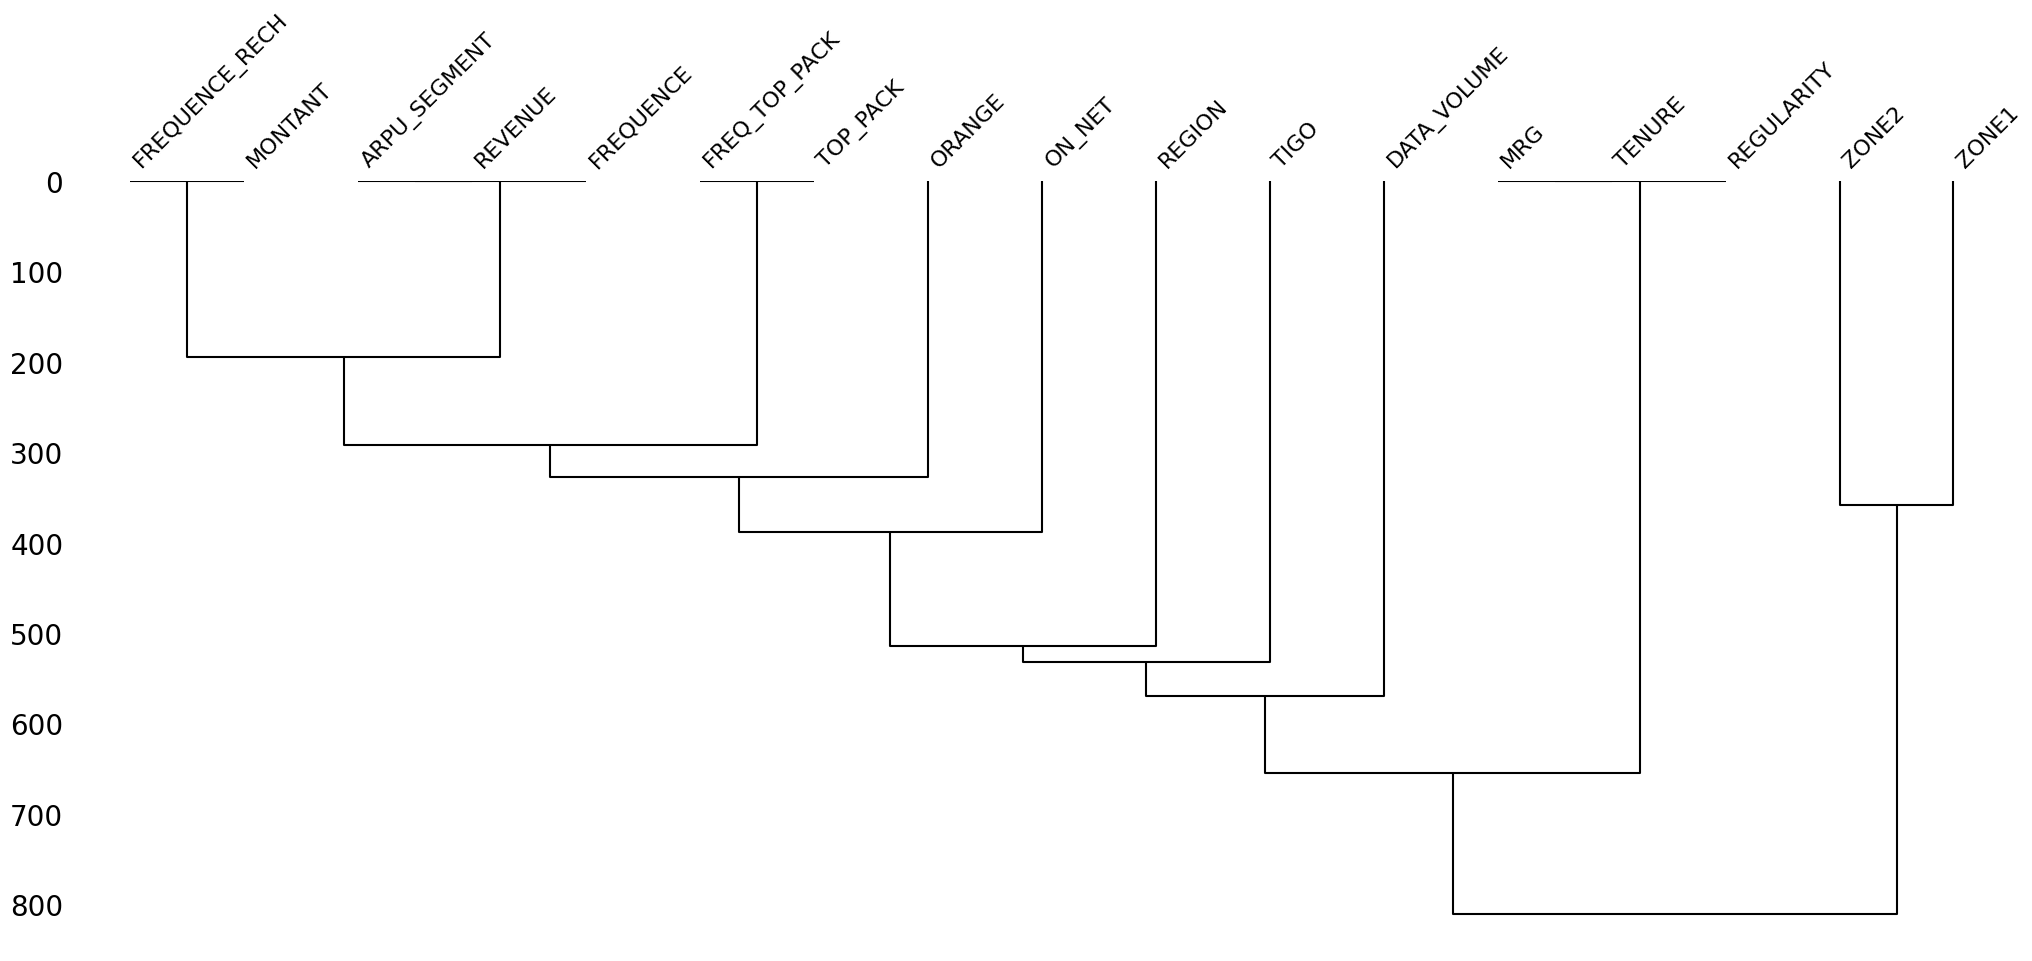

In [101]:
mno.dendrogram(X)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence — one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
- The missingness of __'on_net'__ tends to be more similar to __'orange'__ than to __'region'__ and so on. 

In [102]:
# dropping these 3 columns, because absense in these columns is correlated with absense in other columns
X.dropna(subset=['ARPU_SEGMENT', 'REVENUE', 'FREQUENCE'], how = 'all', inplace=True)
X.shape

(714669, 17)

In [103]:
X.isnull().sum()

REGION            160114
TENURE                 0
MONTANT            26669
FREQUENCE_RECH     26669
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME       240454
ON_NET             87050
ORANGE             91907
TIGO              285619
ZONE1             632790
ZONE2             646093
MRG                    0
REGULARITY             0
TOP_PACK           88569
FREQ_TOP_PACK      88569
dtype: int64

<Axes: >

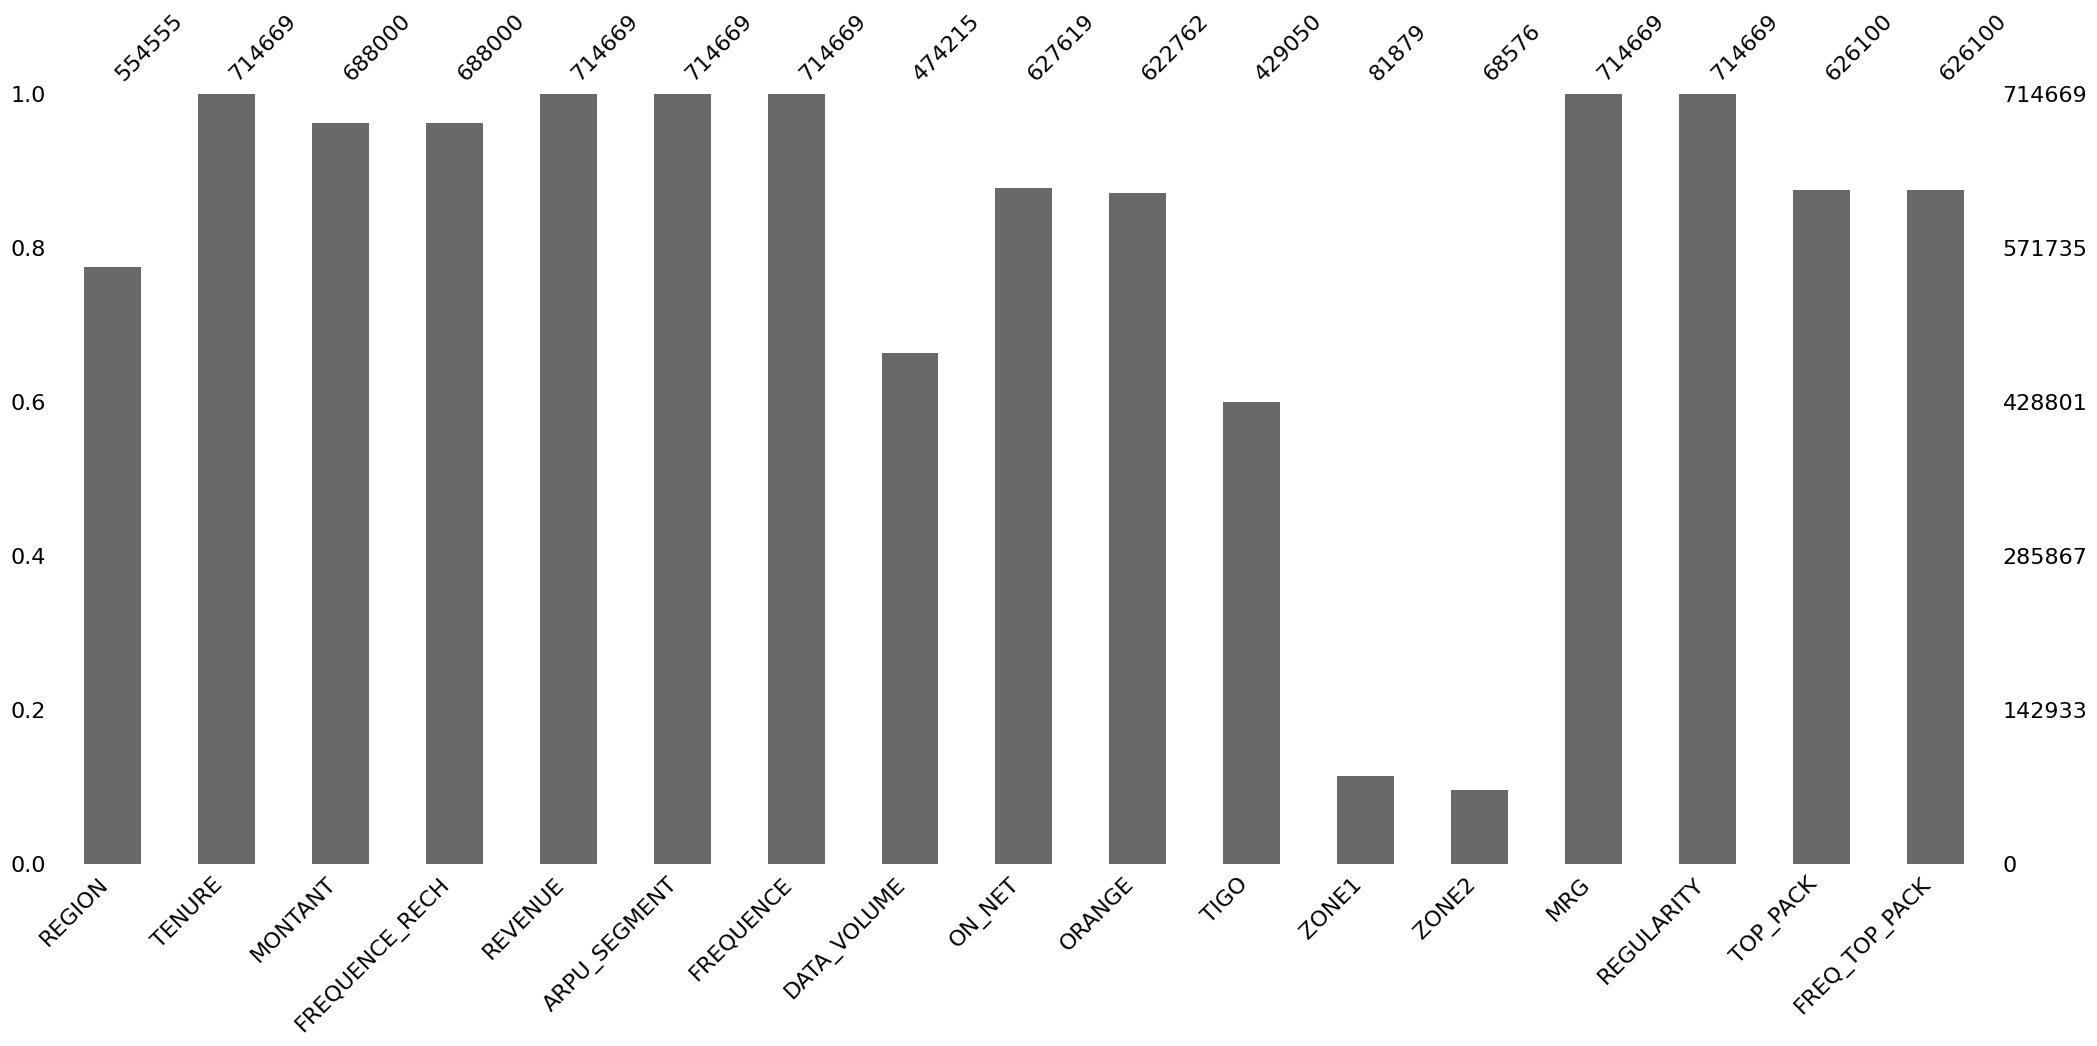

In [104]:
mno.bar(X)

Percentages of missing values in 'zone1' and 'zone2' columns are greater than __90%.__ For that reason, we can drop those columns.

In [105]:
X.drop(columns=['ZONE1', 'ZONE2'], axis=1, inplace=True)

From our earlier calculated correlation heatmap, we can see that REVENUE and ARPU_SEGMENT have a correlation value of 1, therefore we can drop one of the columns

In [106]:
X.drop(columns=['ARPU_SEGMENT'], axis=1, inplace=True)

In [107]:
X.nunique()

REGION               14
TENURE                8
MONTANT            4349
FREQUENCE_RECH      119
REVENUE           31810
FREQUENCE            91
DATA_VOLUME       32395
ON_NET             8201
ORANGE             2669
TIGO               1103
MRG                   1
REGULARITY           62
TOP_PACK            125
FREQ_TOP_PACK       206
dtype: int64

MRG has only one value and hence can be dropped 

In [108]:
X.drop(columns=['MRG'], axis=1, inplace=True)
X.shape

(714669, 13)

#### Multivariate Feature Imputation

In [109]:
ord_enc = OrdinalEncoder()
X["TENURE1"] = ord_enc.fit_transform(X[["TENURE"]])
X[["TENURE1", "TENURE"]].head(10)

,TENURE1,TENURE
0,7.0,K > 24 month
3,7.0,K > 24 month
4,7.0,K > 24 month
5,1.0,E 6-9 month
6,7.0,K > 24 month
9,7.0,K > 24 month
11,7.0,K > 24 month
13,7.0,K > 24 month
16,7.0,K > 24 month
17,7.0,K > 24 month


### 'FREQUENCE_RECH' and 'MONTANT' columns

In [110]:
cols = ['TENURE1', 'REGULARITY', 'FREQUENCE', 'REVENUE', 'FREQUENCE_RECH', 'MONTANT']
data = X[cols]
data

,TENURE1,REGULARITY,FREQUENCE,REVENUE,FREQUENCE_RECH,MONTANT
0,7.0,62,52.0,21602.0,47.0,20000.0
3,7.0,61,25.0,7896.0,19.0,7900.0
4,7.0,56,29.0,12351.0,21.0,12350.0
5,1.0,62,3.0,2000.0,2.0,2000.0
6,7.0,6,1.0,3000.0,1.0,3000.0
...,...,...,...,...,...,...
1077016,7.0,62,38.0,16189.0,34.0,14800.0
1077017,7.0,46,9.0,2950.0,9.0,2800.0
1077020,7.0,34,5.0,2500.0,5.0,2500.0
1077022,7.0,16,1.0,600.0,1.0,600.0


In [111]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(data)
k = pd.DataFrame(impute_it, columns=cols)
k.head()

,TENURE1,REGULARITY,FREQUENCE,REVENUE,FREQUENCE_RECH,MONTANT
0,7.0,62.0,52.0,21602.0,47.0,20000.0
1,7.0,61.0,25.0,7896.0,19.0,7900.0
2,7.0,56.0,29.0,12351.0,21.0,12350.0
3,1.0,62.0,3.0,2000.0,2.0,2000.0
4,7.0,6.0,1.0,3000.0,1.0,3000.0


In [112]:
k = k.rename({'FREQUENCE_RECH': 'FREQUENCE_RECH1'}, axis=1)
k = k.rename({'MONTANT': 'MONTANT1'}, axis=1)
X.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,TENURE1
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,7.0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,7.0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,7.0
5,DAKAR,E 6-9 month,2000.0,2.0,2000.0,3.0,4206.0,246.0,709.0,10.0,62,"On-net 500=4000,10d",1.0,1.0
6,DAKAR,K > 24 month,3000.0,1.0,3000.0,1.0,NaN,NaN,NaN,NaN,6,"Data:3000F=10GB,30d",1.0,7.0


In [113]:
# reset indexes in the dataframe
X.reset_index(inplace=True)
X.head()

,index,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,TENURE1
0,0,DAKAR,K > 24 month,20000.0,47.0,21602.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,7.0
1,3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,7.0
2,4,DAKAR,K > 24 month,12350.0,21.0,12351.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,7.0
3,5,DAKAR,E 6-9 month,2000.0,2.0,2000.0,3.0,4206.0,246.0,709.0,10.0,62,"On-net 500=4000,10d",1.0,1.0
4,6,DAKAR,K > 24 month,3000.0,1.0,3000.0,1.0,NaN,NaN,NaN,NaN,6,"Data:3000F=10GB,30d",1.0,7.0


In [114]:
X.drop(columns=['index'], inplace=True)

In [115]:
extracted_col = k[["FREQUENCE_RECH1", 'MONTANT1']]
X = pd.merge(X, extracted_col, how = 'left', left_index = True, right_index = True)

In [116]:
X.drop(columns=['FREQUENCE_RECH', 'MONTANT'], inplace=True)

<Axes: >

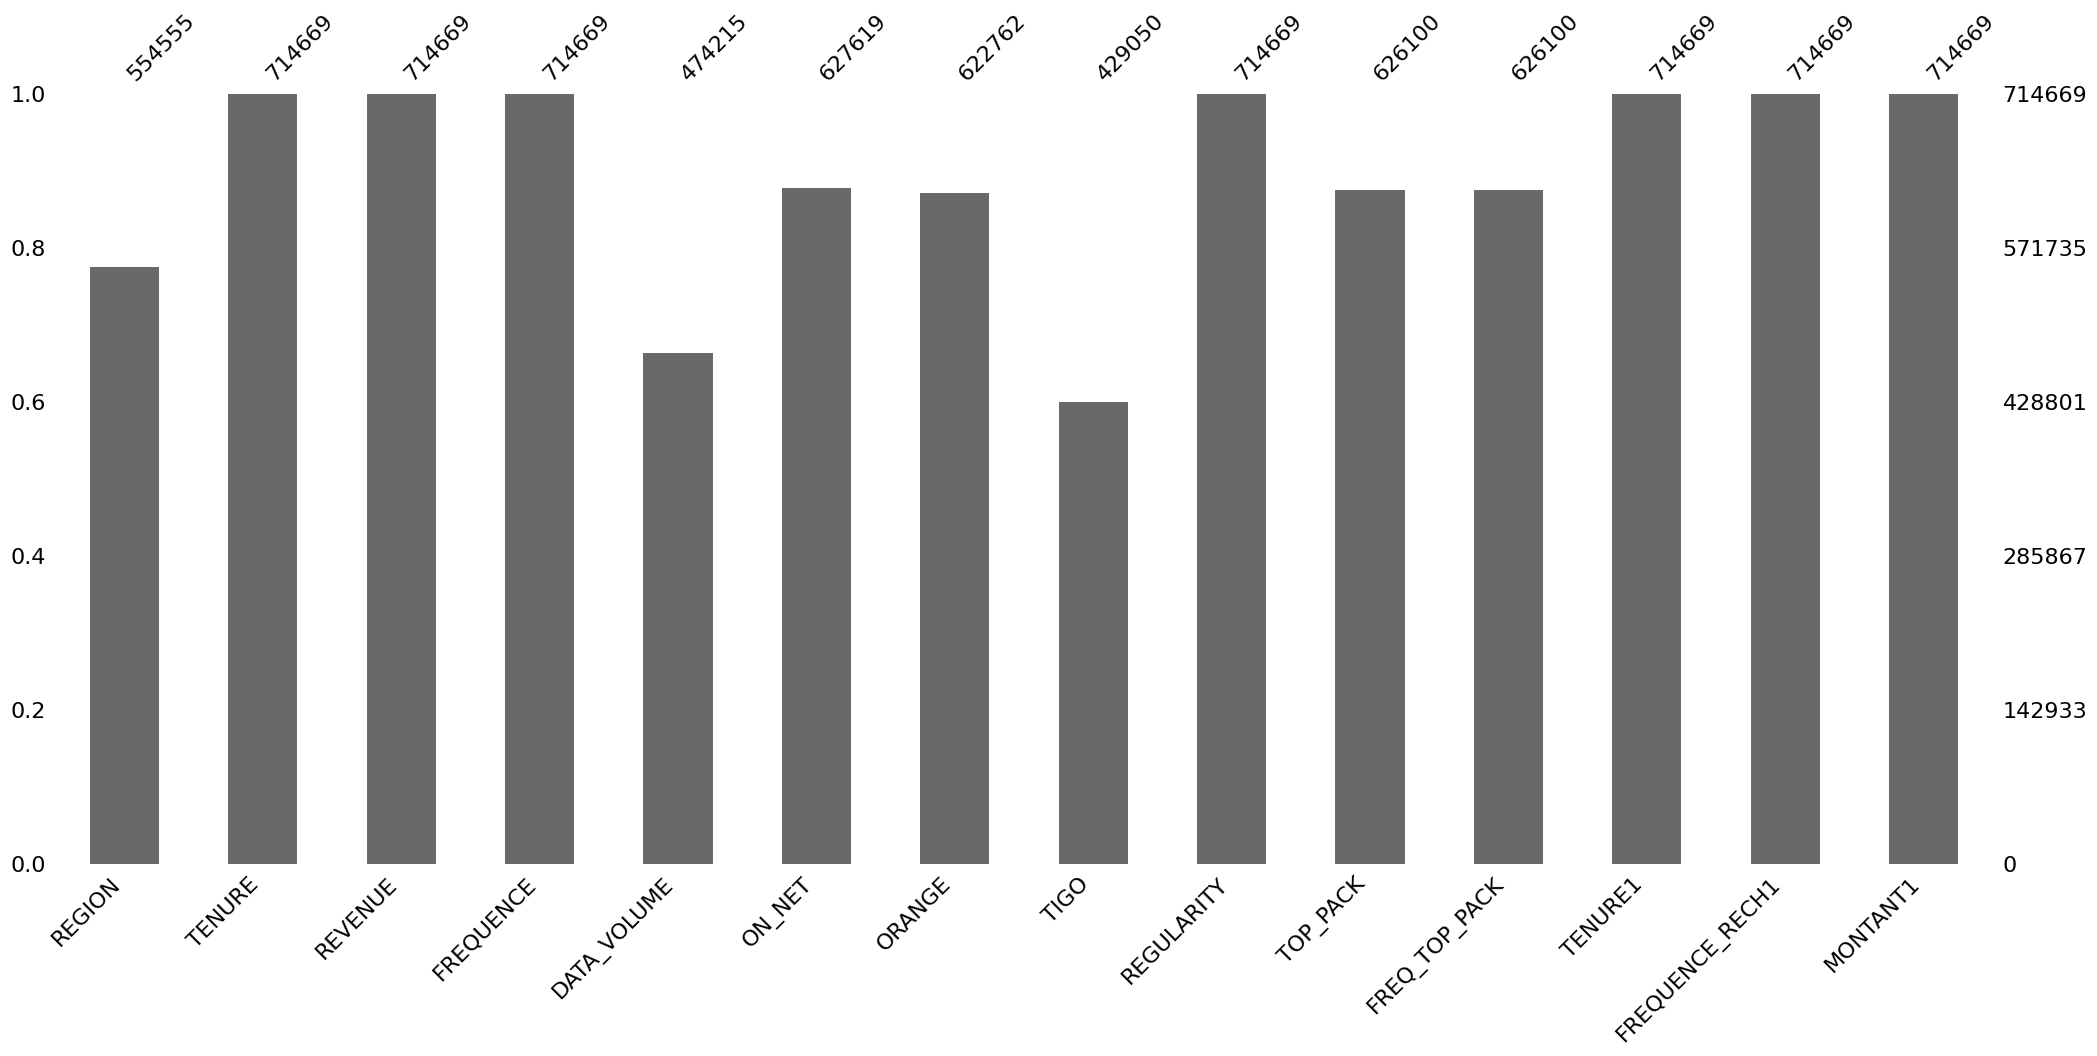

In [117]:
mno.bar(X)

In [118]:
X['TOP_PACK']=X['TOP_PACK'].factorize()[0]
# -1 is nan values in 'top_pack'
X['TOP_PACK'].replace({-1: np.nan }, inplace=True)

#### TOP_PACK and FREQ_TOP_PACK columns

In [119]:
cols = ['REGULARITY', 'FREQUENCE', 'TOP_PACK', 'FREQ_TOP_PACK']
data2 = X[cols]

In [120]:
impute_it2 = IterativeImputer(max_iter=10, random_state=42)
impute_it2 = impute_it2.fit_transform(data2)
m = pd.DataFrame(impute_it2, columns=cols)
m.rename({'TOP_PACK': 'TOP_PACK1'}, axis=1, inplace=True)
m.rename({'FREQ_TOP_PACK': 'FREQ_TOP_PACK1'}, axis=1, inplace=True)
m

,REGULARITY,FREQUENCE,TOP_PACK1,FREQ_TOP_PACK1
0,62.0,52.0,0.0,30.0
1,61.0,25.0,1.0,7.0
2,56.0,29.0,2.0,11.0
3,62.0,3.0,3.0,1.0
4,6.0,1.0,4.0,1.0
...,...,...,...,...
714664,62.0,38.0,1.0,15.0
714665,46.0,9.0,40.0,3.0
714666,34.0,5.0,2.0,2.0
714667,16.0,1.0,12.0,1.0


In [121]:
extracted_col = m[["TOP_PACK1", 'FREQ_TOP_PACK1']]
X = pd.merge(X, extracted_col, how = 'left', left_index = True, right_index = True)

In [122]:
X.drop(columns=['TOP_PACK', 'FREQ_TOP_PACK'], axis=1, inplace=True)
X.isnull().sum()

REGION             160114
TENURE                  0
REVENUE                 0
FREQUENCE               0
DATA_VOLUME        240454
ON_NET              87050
ORANGE              91907
TIGO               285619
REGULARITY              0
TENURE1                 0
FREQUENCE_RECH1         0
MONTANT1                0
TOP_PACK1               0
FREQ_TOP_PACK1          0
dtype: int64

In [123]:
X.drop(columns=['TENURE'], inplace=True)

#### 'DATA_VOLUME' column

In [124]:
lr = LinearRegression()
list1=['TIGO', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGION']
testdf = X[X['DATA_VOLUME'].isnull()==True]
traindf = X[X['DATA_VOLUME'].isnull()==False]
y = traindf['DATA_VOLUME']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['DATA_VOLUME']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/4101752120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/4101752120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/4101752120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [125]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
X = pd.merge(X,result['DATA_VOLUME'], how = 'left',left_index = True, right_index = True) 
X

,REGION,REVENUE,FREQUENCE,DATA_VOLUME_x,ON_NET,ORANGE,TIGO,REGULARITY,TENURE1,FREQUENCE_RECH1,MONTANT1,TOP_PACK1,FREQ_TOP_PACK1,DATA_VOLUME_y
0,DAKAR,21602.0,52.0,8835.0,3391.0,396.0,185.0,62,7.0,47.0,20000.0,0.0,30.0,8835.000000
1,SAINT-LOUIS,7896.0,25.0,9385.0,27.0,46.0,20.0,61,7.0,19.0,7900.0,1.0,7.0,9385.000000
2,DAKAR,12351.0,29.0,9360.0,66.0,102.0,34.0,56,7.0,21.0,12350.0,2.0,11.0,9360.000000
3,DAKAR,2000.0,3.0,4206.0,246.0,709.0,10.0,62,1.0,2.0,2000.0,3.0,1.0,4206.000000
4,DAKAR,3000.0,1.0,NaN,NaN,NaN,NaN,6,7.0,1.0,3000.0,4.0,1.0,1595.220880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714664,DAKAR,16189.0,38.0,17112.0,32.0,142.0,13.0,62,7.0,34.0,14800.0,1.0,15.0,17112.000000
714665,DAKAR,2950.0,9.0,NaN,19.0,42.0,0.0,46,7.0,9.0,2800.0,40.0,3.0,4786.733629
714666,TAMBACOUNDA,2500.0,5.0,0.0,15.0,77.0,NaN,34,7.0,5.0,2500.0,2.0,2.0,0.000000
714667,NaN,600.0,1.0,591.0,11.0,37.0,5.0,16,7.0,1.0,600.0,12.0,1.0,591.000000


In [126]:
X.drop('DATA_VOLUME_x', axis=1, inplace=True)

#### 'ON_NET' column

In [127]:
lr = LinearRegression()
list1=['ON_NET', 'ORANGE', 'TIGO', 'REGION']
testdf = X[X['ON_NET'].isnull()==True]
traindf = X[X['ON_NET'].isnull()==False]
y = traindf['ON_NET']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['ON_NET']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/4042816307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/4042816307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/4042816307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [128]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1

In [129]:
frames = [df_out, testdf]
result = pd.concat(frames)
X = pd.merge(X, result['ON_NET'], how = 'left',left_index = True, right_index = True) 

In [130]:
X.drop('ON_NET_x', axis=1, inplace=True)

#### 'TIGO' Column

In [131]:
cols = ['REVENUE', 'TENURE1', 'REGULARITY', 'FREQUENCE', 'TIGO']
X3 = X[cols]

impute_it3 = IterativeImputer(max_iter=10, random_state=42)
impute_it3 = impute_it3.fit_transform(X3)
m = pd.DataFrame(impute_it3, columns=cols)

In [132]:
X = pd.merge(X, m['TIGO'], how = 'left', left_index = True, right_index = True)
X.drop('TIGO_x', axis=1, inplace=True)

Since initially the type of __'TIGO'__ column was integer, we convert it from float to integer type.

#### 'REGION' column

In [133]:
# factorizing values in 'region' column
X['REGION']= X['REGION'].factorize()[0]
# replace -1 with NaN value
X['REGION'] = X['REGION'].replace(-1, np.nan)

In [134]:
neighbour = KNeighborsClassifier(n_neighbors=3)
list1=['ORANGE', 'REGION']
testdf1 = X[X['REGION'].isnull()==True]
traindf1 = X[X['REGION'].isnull()==False]
y = traindf1['REGION']
traindf1.drop(columns=list1,axis=1,inplace=True)
neighbour.fit(traindf1,y)
testdf1.drop(columns=list1,axis=1,inplace=True)
pred = neighbour.predict(testdf1)
testdf1['REGION']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/1083561172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf1.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/1083561172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf1.drop(columns=list1,axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/1083561172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [135]:
df_out = pd.merge(traindf1, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf1]
result = pd.concat(frames)
X = pd.merge(X,result['REGION'], how = 'left',left_index = True, right_index = True) 

In [136]:
X.drop('REGION_x', axis=1, inplace=True)

#### 'ORANGE' Column

In [137]:
lr = LinearRegression()
testdf = X[X['ORANGE'].isnull()==True]
traindf = X[X['ORANGE'].isnull()==False]
y = traindf['ORANGE']
traindf.drop(['ORANGE'],axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(['ORANGE'],axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['ORANGE']= pred

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/2394459719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(['ORANGE'],axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/2394459719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(['ORANGE'],axis=1,inplace=True)
/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_22309/2394459719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [138]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
X = pd.merge(X, result['ORANGE'], how = 'left',left_index = True, right_index = True) 

In [139]:
X.drop('ORANGE_x', axis=1, inplace=True)

In [140]:
X.isnull().sum()

REVENUE            0
FREQUENCE          0
REGULARITY         0
TENURE1            0
FREQUENCE_RECH1    0
MONTANT1           0
TOP_PACK1          0
FREQ_TOP_PACK1     0
DATA_VOLUME_y      0
ON_NET_y           0
TIGO_y             0
REGION_y           0
ORANGE_y           0
dtype: int64

## Drop Duplicates

In [141]:
# Use pandas.DataFrame.drop_duplicates method

## Dataset Splitting

In [142]:
# Use train_test_split with a random_state, and add stratify for Classification

## Impute Missing Values

In [143]:
# Use sklearn.impute.SimpleImputer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy ='most_frequent')

In [144]:
# select the categorical columns from train, eval data and test
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
eval_cat_cols = X_eval.select_dtypes(include=['object', 'category']).columns.tolist()
test_cat_cols = test_set.select_dtypes(include=['object', 'category']).columns.tolist()

NameError: name 'X_train' is not defined

In [ ]:
# select numerical columns from the train, eval data and test
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()
eval_num_cols=X_eval.select_dtypes(exclude=['object', 'category']).columns.tolist()
test_num_cols=test_set.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [ ]:
# Fit the imputer on the training data and transform the training, evaluation data and test
x_train_cat_imputer=cat_imputer.fit_transform(X_train[train_cat_cols])
x_train_num_imputer=num_imputer.fit_transform(X_train[train_num_cols])

x_eval_cat_imputer=cat_imputer.transform(X_eval[eval_cat_cols])
x_eval_num_imputer=num_imputer.transform(X_eval[eval_num_cols])

test_cat_imputer=cat_imputer.transform(test_set[test_cat_cols])
test_num_imputer=num_imputer.transform(test_set[test_num_cols])

## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app